In [98]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 20})

In [99]:
E_FermiM_tvdw = -1.38805
E_FermiAA_tvdw =  4.90685
E_FermiAB_tvdw = 5.6741
E_FermiAC_tvdw = 6.08095

E_FermiM_vdw = -1.5127
E_FermiAA_vdw = 5.5045
E_FermiAB_vdw = 6.54135
E_FermiAC_vdw =6.7474

tau = 1*10**(-14)

In [100]:
# data= pd.read_csv('data_$Al_{2}S_{2}$ non-vdW.dat', sep='\s+|\s+')
# data= pd.read_csv('/home/kmdn/research/jurnal/WSTe/data_$Al_{2}S_{2}$ non-vdW.dat', sep='\s+|\s+')
dataM_tvdw = pd.read_csv('/home/kmdn/research/jurnal/Al2SO/mono/tanpa_vdw/interpolation.trace', sep='\s+|\s+')
datAA_tvdw= pd.read_csv('/home/kmdn/research/jurnal/Al2SO/bulk/bulkAA/tanpa_vdw/interpolation.trace', sep='\s+|\s+')
dataAB_tvdw= pd.read_csv('/home/kmdn/research/jurnal/Al2SO/bulk/bulkAB/tanpa_vdw/interpolation.trace', sep='\s+|\s+')
dataAC_tvdw= pd.read_csv('/home/kmdn/research/jurnal/Al2SO/bulk/bulkAC/tanpa_vdw/interpolation.trace', sep='\s+|\s+')

dataM_vdw = pd.read_csv('/home/kmdn/research/jurnal/Al2SO/mono/vdw/interpolation.trace', sep='\s+|\s+')
datAA_vdw= pd.read_csv('/home/kmdn/research/jurnal/Al2SO/bulk/bulkAA/vdw/interpolation.trace', sep='\s+|\s+')
dataAB_vdw= pd.read_csv('/home/kmdn/research/jurnal/Al2SO/bulk/bulkAB/vdw/interpolation.trace', sep='\s+|\s+')
dataAC_vdw= pd.read_csv('/home/kmdn/research/jurnal/Al2SO/bulk/bulkAC/vdw/interpolation.trace', sep='\s+|\s+')

/tmp/ipykernel_37213/3024075355.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataM_tvdw = pd.read_csv('/home/kmdn/research/jurnal/Al2SO/mono/tanpa_vdw/interpolation.trace', sep='\s+|\s+')
/tmp/ipykernel_37213/3024075355.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datAA_tvdw= pd.read_csv('/home/kmdn/research/jurnal/Al2SO/bulk/bulkAA/tanpa_vdw/interpolation.trace', sep='\s+|\s+')
/tmp/ipykernel_37213/3024075355.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as reg

In [101]:
dataM_tvdw.head()

,Ef[Ry],T[K],N[e/uc],DOS(ef)[1/(Ha*uc)],S[V/K],sigma/tau0[1/(ohm*m*s)],RH[m**3/C],kappae/tau0[W/(m*K*s)],cv[J/(mol*K)],chi[m**3/mol]
0,-1.09352,100,15.2962,9.84199,-0.000011,2.828010e+19,1.097280e-08,6.377870e+13,0.154023,6.435890e-13
1,-1.09352,200,15.2963,9.90317,-0.000022,2.849380e+19,1.159580e-08,1.520560e+14,0.367337,6.475890e-13
2,-1.09352,300,15.2964,10.02400,-0.000027,2.934500e+19,1.025910e-08,2.228170e+14,0.540701,6.554930e-13
3,-1.09352,400,15.2963,10.08780,-0.000031,2.962340e+19,9.151670e-09,2.918480e+14,0.713421,6.596630e-13
4,-1.09352,500,15.2961,10.11040,-0.000036,2.969250e+19,8.054920e-09,3.606310e+14,0.890443,6.611430e-13


In [102]:
datAA_tvdw.columns
dataAB_tvdw.columns
dataAC_tvdw.columns

Index(['Ef[Ry]', 'T[K]', 'N[e/uc]', 'DOS(ef)[1/(Ha*uc)]', 'S[V/K]',
       'sigma/tau0[1/(ohm*m*s)]', 'RH[m**3/C]', 'kappae/tau0[W/(m*K*s)]',
       'cv[J/(mol*K)]', 'chi[m**3/mol]'],
      dtype='object')

In [103]:
datM_tvdw300 = dataM_tvdw[dataM_tvdw['T[K]']==300].reset_index(drop=True)
datM_tvdw600 = dataM_tvdw[dataM_tvdw['T[K]']==600].reset_index(drop=True)
datM_tvdw900 = dataM_tvdw[dataM_tvdw['T[K]']==900].reset_index(drop=True)
datM_tvdw1200 = dataM_tvdw[dataM_tvdw['T[K]']==1200].reset_index(drop=True)

datAA_tvdw300 = datAA_tvdw[datAA_tvdw['T[K]']==300].reset_index(drop=True)
datAA_tvdw600 = datAA_tvdw[datAA_tvdw['T[K]']==600].reset_index(drop=True)
datAA_tvdw900 = datAA_tvdw[datAA_tvdw['T[K]']==900].reset_index(drop=True)
datAA_tvdw1200 = datAA_tvdw[datAA_tvdw['T[K]']==1200].reset_index(drop=True)

datAB_tvdw300 = dataAB_tvdw[dataAB_tvdw['T[K]']==300].reset_index(drop=True)
datAB_tvdw600 = dataAB_tvdw[dataAB_tvdw['T[K]']==600].reset_index(drop=True)
datAB_tvdw900 = dataAB_tvdw[dataAB_tvdw['T[K]']==900].reset_index(drop=True)
datAB_tvdw1200 = dataAB_tvdw[dataAB_tvdw['T[K]']==1200].reset_index(drop=True)

datAC_tvdw300 = dataAC_tvdw[dataAC_tvdw['T[K]']==300].reset_index(drop=True)
datAC_tvdw600 = dataAC_tvdw[dataAC_tvdw['T[K]']==600].reset_index(drop=True)
datAC_tvdw900 = dataAC_tvdw[dataAC_tvdw['T[K]']==900].reset_index(drop=True)
datAC_tvdw1200 = dataAC_tvdw[dataAC_tvdw['T[K]']==1200].reset_index(drop=True)

In [104]:
datM_vdw300 = dataM_vdw[dataM_vdw['T[K]']==300].reset_index(drop=True)
datM_vdw600 = dataM_vdw[dataM_vdw['T[K]']==600].reset_index(drop=True)
datM_vdw900 = dataM_vdw[dataM_vdw['T[K]']==900].reset_index(drop=True)
datM_vdw1200 = dataM_vdw[dataM_vdw['T[K]']==1200].reset_index(drop=True)

datAA_vdw300 = datAA_vdw[datAA_vdw['T[K]']==300].reset_index(drop=True)
datAA_vdw600 = datAA_vdw[datAA_vdw['T[K]']==600].reset_index(drop=True)
datAA_vdw900 = datAA_vdw[datAA_vdw['T[K]']==900].reset_index(drop=True)
datAA_vdw1200 = datAA_vdw[datAA_vdw['T[K]']==1200].reset_index(drop=True)

datAB_vdw300 = dataAB_vdw[dataAB_vdw['T[K]']==300].reset_index(drop=True)
datAB_vdw600 = dataAB_vdw[dataAB_vdw['T[K]']==600].reset_index(drop=True)
datAB_vdw900 = dataAB_vdw[dataAB_vdw['T[K]']==900].reset_index(drop=True)
datAB_vdw1200 = dataAB_vdw[dataAB_vdw['T[K]']==1200].reset_index(drop=True)

datAC_vdw300 = dataAC_vdw[dataAC_vdw['T[K]']==300].reset_index(drop=True)
datAC_vdw600 = dataAC_vdw[dataAC_vdw['T[K]']==600].reset_index(drop=True)
datAC_vdw900 = dataAC_vdw[dataAC_vdw['T[K]']==900].reset_index(drop=True)
datAC_vdw1200 = dataAC_vdw[dataAC_vdw['T[K]']==1200].reset_index(drop=True)

In [105]:
datAA_tvdw900.head()

,Ef[Ry],T[K],N[e/uc],DOS(ef)[1/(Ha*uc)],S[V/K],sigma/tau0[1/(ohm*m*s)],RH[m**3/C],kappae/tau0[W/(m*K*s)],cv[J/(mol*K)],chi[m**3/mol]
0,-0.629398,900,30.6270,19.9171,-0.000004,8.781360e+19,1.135440e-09,1.848980e+15,1.61921,1.970990e-12
1,-0.627226,900,30.5832,20.2217,-0.000004,8.942490e+19,1.066050e-09,1.878060e+15,1.64720,2.001140e-12
2,-0.625054,900,30.5386,20.5382,-0.000003,9.091750e+19,8.403360e-10,1.906400e+15,1.67888,2.032460e-12
3,-0.622882,900,30.4933,20.8658,-0.000004,9.228170e+19,5.584800e-10,1.933780e+15,1.71464,2.064880e-12
4,-0.620710,900,30.4473,21.2080,-0.000004,9.352330e+19,2.892960e-10,1.959370e+15,1.75437,2.098740e-12


In [106]:
# data koefisien seebeck
X3_S_M_tvdw=datM_tvdw300.iloc[:,0]*13.6057-E_FermiM_tvdw
Y3_S_M_tvdw=datM_tvdw300.iloc[:,4]
X6_S_M_tvdw=datM_tvdw600.iloc[:,0]*13.6057-E_FermiM_tvdw
Y6_S_M_tvdw=datM_tvdw600.iloc[:,4]
X9_S_M_tvdw=datM_tvdw900.iloc[:,0]*13.6057-E_FermiM_tvdw
Y9_S_M_tvdw=datM_tvdw900.iloc[:,4]
X12_S_M_tvdw=datM_tvdw1200.iloc[:,0]*13.6057-E_FermiM_tvdw
Y12_S_M_tvdw=datM_tvdw1200.iloc[:,4]

X3_S_AA_tvdw=datAA_tvdw300.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y3_S_AA_tvdw=datAA_tvdw300.iloc[:,4]
X6_S_AA_tvdw=datAA_tvdw600.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y6_S_AA_tvdw=datAA_tvdw600.iloc[:,4]
X9_S_AA_tvdw=datAA_tvdw900.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y9_S_AA_tvdw=datAA_tvdw900.iloc[:,4]
X12_S_AA_tvdw=datAA_tvdw1200.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y12_S_AA_tvdw=datAA_tvdw1200.iloc[:,4]

X3_S_AB_tvdw=datAB_tvdw300.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y3_S_AB_tvdw=datAB_tvdw300.iloc[:,4]
X6_S_AB_tvdw=datAB_tvdw600.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y6_S_AB_tvdw=datAB_tvdw600.iloc[:,4]
X9_S_AB_tvdw=datAB_tvdw900.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y9_S_AB_tvdw=datAB_tvdw900.iloc[:,4]
X12_S_AB_tvdw=datAB_tvdw1200.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y12_S_AB_tvdw=datAB_tvdw1200.iloc[:,4]

X3_S_AC_tvdw=datAC_tvdw300.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y3_S_AC_tvdw=datAC_tvdw300.iloc[:,4]
X6_S_AC_tvdw=datAC_tvdw600.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y6_S_AC_tvdw=datAC_tvdw600.iloc[:,4]
X9_S_AC_tvdw=datAC_tvdw900.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y9_S_AC_tvdw=datAC_tvdw900.iloc[:,4]
X12_S_AC_tvdw=datAC_tvdw1200.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y12_S_AC_tvdw=datAC_tvdw1200.iloc[:,4]

X3_S_M_vdw=datM_vdw300.iloc[:,0]*13.6057-E_FermiM_vdw
Y3_S_M_vdw=datM_vdw300.iloc[:,4]
X6_S_M_vdw=datM_vdw600.iloc[:,0]*13.6057-E_FermiM_vdw
Y6_S_M_vdw=datM_vdw600.iloc[:,4]
X9_S_M_vdw=datM_vdw900.iloc[:,0]*13.6057-E_FermiM_vdw
Y9_S_M_vdw=datM_vdw900.iloc[:,4]
X12_S_M_vdw=datM_vdw1200.iloc[:,0]*13.6057-E_FermiM_vdw
Y12_S_M_vdw=datM_vdw1200.iloc[:,4]

X3_S_AA_vdw=datAA_vdw300.iloc[:,0]*13.6057-E_FermiAA_vdw
Y3_S_AA_vdw=datAA_vdw300.iloc[:,4]
X6_S_AA_vdw=datAA_vdw600.iloc[:,0]*13.6057-E_FermiAA_vdw
Y6_S_AA_vdw=datAA_vdw600.iloc[:,4]
X9_S_AA_vdw=datAA_vdw900.iloc[:,0]*13.6057-E_FermiAA_vdw
Y9_S_AA_vdw=datAA_vdw900.iloc[:,4]
X12_S_AA_vdw=datAA_vdw1200.iloc[:,0]*13.6057-E_FermiAA_vdw
Y12_S_AA_vdw=datAA_vdw1200.iloc[:,4]

X3_S_AB_vdw=datAB_vdw300.iloc[:,0]*13.6057-E_FermiAB_vdw
Y3_S_AB_vdw=datAB_vdw300.iloc[:,4]
X6_S_AB_vdw=datAB_vdw600.iloc[:,0]*13.6057-E_FermiAB_vdw
Y6_S_AB_vdw=datAB_vdw600.iloc[:,4]
X9_S_AB_vdw=datAB_vdw900.iloc[:,0]*13.6057-E_FermiAB_vdw
Y9_S_AB_vdw=datAB_vdw900.iloc[:,4]
X12_S_AB_vdw=datAB_vdw1200.iloc[:,0]*13.6057-E_FermiAB_vdw
Y12_S_AB_vdw=datAB_vdw1200.iloc[:,4]

X3_S_AC_vdw=datAC_vdw300.iloc[:,0]*13.6057-E_FermiAC_vdw
Y3_S_AC_vdw=datAC_vdw300.iloc[:,4]
X6_S_AC_vdw=datAC_vdw600.iloc[:,0]*13.6057-E_FermiAC_vdw
Y6_S_AC_vdw=datAC_vdw600.iloc[:,4]
X9_S_AC_vdw=datAC_vdw900.iloc[:,0]*13.6057-E_FermiAC_vdw
Y9_S_AC_vdw=datAC_vdw900.iloc[:,4]
X12_S_AC_vdw=datAC_vdw1200.iloc[:,0]*13.6057-E_FermiAC_vdw
Y12_S_AC_vdw=datAC_vdw1200.iloc[:,4]

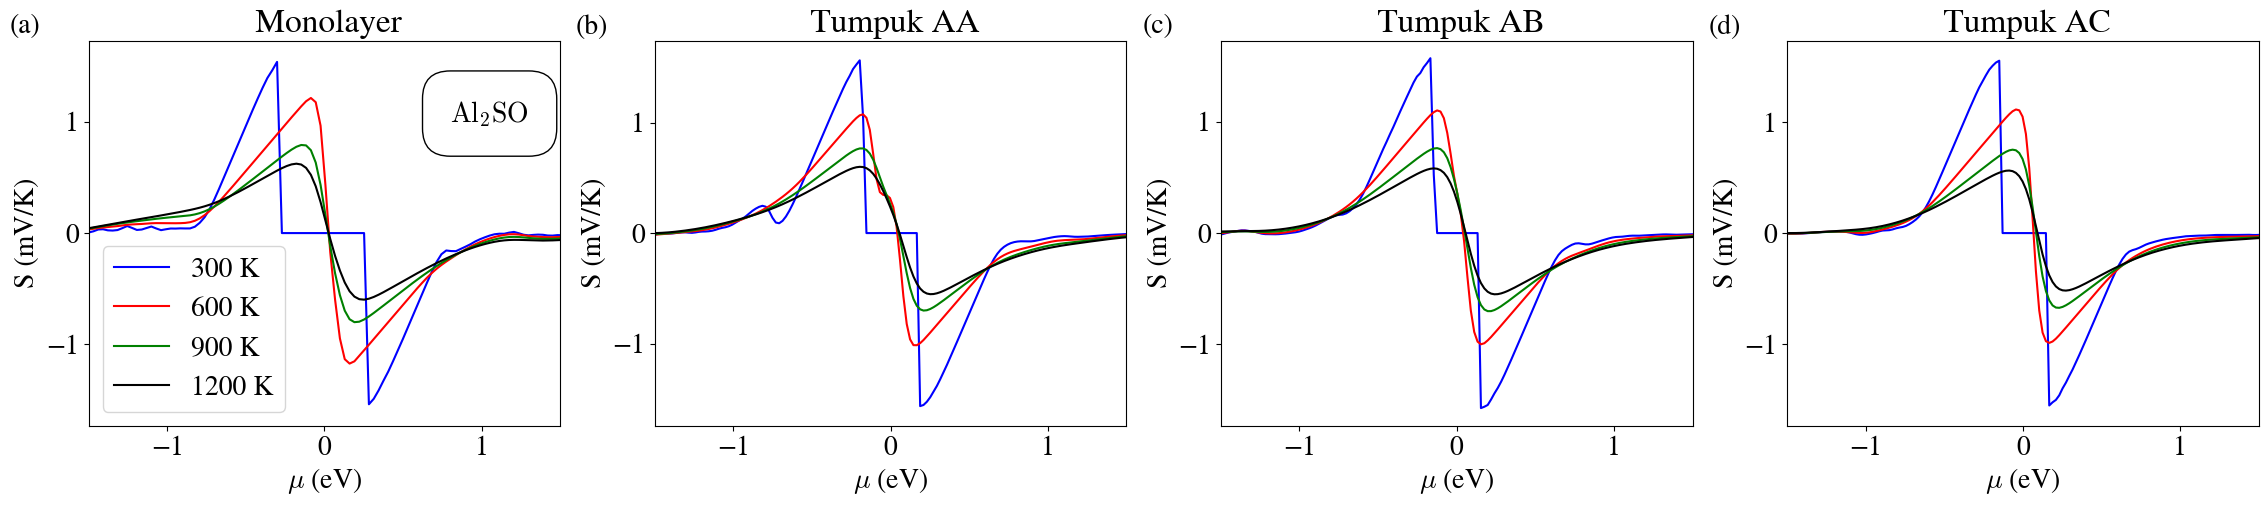

In [107]:
fig, axs = plt.subplots(1,4,figsize=(28,5))
axs[0].plot(X3_S_M_tvdw,Y3_S_M_tvdw*1000, color ='blue', label='300 K')
axs[0].plot(X6_S_M_tvdw,Y6_S_M_tvdw*1000, color ='red', label='600 K')
axs[0].plot(X9_S_M_tvdw,Y9_S_M_tvdw*1000, color='green', label ='900 K')
axs[0].plot(X12_S_M_tvdw,Y12_S_M_tvdw*1000, color='black', label ='1200 K')
axs[0].set_title(r' Monolayer')
axs[0].set_ylabel(r'S (mV/K)' )
axs[0].set_xlim([-1.5, 1.5])
axs[0].set_xlabel(r'$\mu$ (eV)' )
axs[0].legend(loc='lower left')
axs[0].text(0.8,1,r'$\mathrm{Al}_{2}\mathrm{SO}$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

# axs[1].plot(X3_S_AA_tvdw,Y3_S_AA_tvdw*1000, color ='blue', label='300 K')
# axs[1].plot(X6_S_AA_tvdw,Y6_S_AA_tvdw*1000, color ='red', label='600 K')
# axs[1].plot(X9_S_AA_tvdw,Y9_S_AA_tvdw*1000, color='green', label ='900 K')
# axs[1].plot(X12_S_AA_tvdw,Y12_S_AA_tvdw*1000, color='black', label ='1200 K')
axs[1].plot(X3_S_AA_vdw,Y3_S_AA_vdw*1000, color ='blue', linestyle='solid')
axs[1].plot(X6_S_AA_vdw,Y6_S_AA_vdw*1000, color ='red', linestyle='solid')
axs[1].plot(X9_S_AA_vdw,Y9_S_AA_vdw*1000, color='green', linestyle='solid')
axs[1].plot(X12_S_AA_vdw,Y12_S_AA_vdw*1000, color='black', linestyle='solid')
axs[1].set_title(r' Tumpuk AA')
axs[1].set_ylabel(r'S (mV/K)' )
axs[1].set_xlim([-1.5, 1.5])
axs[1].set_xlabel(r'$\mu$ (eV)' )

# axs[2].plot(X3_S_AB_tvdw,Y3_S_AB_tvdw*1000, color ='blue', label='300 K')
# axs[2].plot(X6_S_AB_tvdw,Y6_S_AB_tvdw*1000, color ='red', label='600 K')
# axs[2].plot(X9_S_AB_tvdw,Y9_S_AB_tvdw*1000, color='green', label ='900 K')
# axs[2].plot(X12_S_AB_tvdw,Y12_S_AB_tvdw*1000, color='black', label ='1200 K')
axs[2].plot(X3_S_AB_vdw,Y3_S_AB_vdw*1000, color ='blue', linestyle='solid')
axs[2].plot(X6_S_AB_vdw,Y6_S_AB_vdw*1000, color ='red', linestyle='solid')
axs[2].plot(X9_S_AB_vdw,Y9_S_AB_vdw*1000, color='green', linestyle='solid')
axs[2].plot(X12_S_AB_vdw,Y12_S_AB_vdw*1000, color='black', linestyle='solid')
axs[2].set_title(r' Tumpuk AB')
axs[2].set_ylabel(r'S (mV/K)' )
axs[2].set_xlim([-1.5, 1.5])
axs[2].set_xlabel(r'$\mu$ (eV)' )

# axs[3].plot(X3_S_AC_tvdw,Y3_S_AC_tvdw*1000, color ='blue', label='300 K')
# axs[3].plot(X6_S_AC_tvdw,Y6_S_AC_tvdw*1000, color ='red', label='600 K')
# axs[3].plot(X9_S_AC_tvdw,Y9_S_AC_tvdw*1000, color='green', label ='900 K')
# axs[3].plot(X12_S_AC_tvdw,Y12_S_AC_tvdw*1000, color='black', label ='1200 K')
axs[3].plot(X3_S_AC_vdw,Y3_S_AC_vdw*1000, color ='blue', linestyle='solid')
axs[3].plot(X6_S_AC_vdw,Y6_S_AC_vdw*1000, color ='red', linestyle='solid')
axs[3].plot(X9_S_AC_vdw,Y9_S_AC_vdw*1000, color='green', linestyle='solid')
axs[3].plot(X12_S_AC_vdw,Y12_S_AC_vdw*1000, color='black', linestyle='solid')
axs[3].set_title(r' Tumpuk AC')
axs[3].set_ylabel(r'S (mV/K)' )
axs[3].set_xlim([-1.5,1.5])
axs[3].set_xlabel(r'$\mu$ (eV)' )

axs[0].text(-2, 1.8,'(a)')
axs[1].text(-2, 1.8,'(b)')
axs[2].text(-2, 1.8,'(c)')
axs[3].text(-2, 1.8,'(d)')
plt.savefig('seebeck_al2so_ppt.jpeg', bbox_inches='tight')
plt.show()

In [108]:
# data konduktivitas listrik
X3_s_M_tvdw=datM_tvdw300.iloc[:,0]*13.6057-E_FermiM_tvdw
Y3_s_M_tvdw=datM_tvdw300.iloc[:,5]
X6_s_M_tvdw=datM_tvdw600.iloc[:,0]*13.6057-E_FermiM_tvdw
Y6_s_M_tvdw=datM_tvdw600.iloc[:,5]
X9_s_M_tvdw=datM_tvdw900.iloc[:,0]*13.6057-E_FermiM_tvdw
Y9_s_M_tvdw=datM_tvdw900.iloc[:,5]
X12_s_M_tvdw=datM_tvdw1200.iloc[:,0]*13.6057-E_FermiM_tvdw
Y12_s_M_tvdw=datM_tvdw1200.iloc[:,5]

X3_s_AA_tvdw=datAA_tvdw300.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y3_s_AA_tvdw=datAA_tvdw300.iloc[:,5]
X6_s_AA_tvdw=datAA_tvdw600.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y6_s_AA_tvdw=datAA_tvdw600.iloc[:,5]
X9_s_AA_tvdw=datAA_tvdw900.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y9_s_AA_tvdw=datAA_tvdw900.iloc[:,5]
X12_s_AA_tvdw=datAA_tvdw1200.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y12_s_AA_tvdw=datAA_tvdw1200.iloc[:,5]

X3_s_AB_tvdw=datAB_tvdw300.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y3_s_AB_tvdw=datAB_tvdw300.iloc[:,5]
X6_s_AB_tvdw=datAB_tvdw600.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y6_s_AB_tvdw=datAB_tvdw600.iloc[:,5]
X9_s_AB_tvdw=datAB_tvdw900.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y9_s_AB_tvdw=datAB_tvdw900.iloc[:,5]
X12_s_AB_tvdw=datAB_tvdw1200.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y12_s_AB_tvdw=datAB_tvdw1200.iloc[:,5]

X3_s_AC_tvdw=datAC_tvdw300.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y3_s_AC_tvdw=datAC_tvdw300.iloc[:,5]
X6_s_AC_tvdw=datAC_tvdw600.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y6_s_AC_tvdw=datAC_tvdw600.iloc[:,5]
X9_s_AC_tvdw=datAC_tvdw900.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y9_s_AC_tvdw=datAC_tvdw900.iloc[:,5]
X12_s_AC_tvdw=datAC_tvdw1200.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y12_s_AC_tvdw=datAC_tvdw1200.iloc[:,5]

X3_s_M_vdw=datM_vdw300.iloc[:,0]*13.6057-E_FermiM_vdw
Y3_s_M_vdw=datM_vdw300.iloc[:,5]
X6_s_M_vdw=datM_vdw600.iloc[:,0]*13.6057-E_FermiM_vdw
Y6_s_M_vdw=datM_vdw600.iloc[:,5]
X9_s_M_vdw=datM_vdw900.iloc[:,0]*13.6057-E_FermiM_vdw
Y9_s_M_vdw=datM_vdw900.iloc[:,5]
X12_s_M_vdw=datM_vdw1200.iloc[:,0]*13.6057-E_FermiM_vdw
Y12_s_M_vdw=datM_vdw1200.iloc[:,5]

X3_s_AA_vdw=datAA_vdw300.iloc[:,0]*13.6057-E_FermiAA_vdw
Y3_s_AA_vdw=datAA_vdw300.iloc[:,5]
X6_s_AA_vdw=datAA_vdw600.iloc[:,0]*13.6057-E_FermiAA_vdw
Y6_s_AA_vdw=datAA_vdw600.iloc[:,5]
X9_s_AA_vdw=datAA_vdw900.iloc[:,0]*13.6057-E_FermiAA_vdw
Y9_s_AA_vdw=datAA_vdw900.iloc[:,5]
X12_s_AA_vdw=datAA_vdw1200.iloc[:,0]*13.6057-E_FermiAA_vdw
Y12_s_AA_vdw=datAA_vdw1200.iloc[:,5]

X3_s_AB_vdw=datAB_vdw300.iloc[:,0]*13.6057-E_FermiAB_vdw
Y3_s_AB_vdw=datAB_vdw300.iloc[:,5]
X6_s_AB_vdw=datAB_vdw600.iloc[:,0]*13.6057-E_FermiAB_vdw
Y6_s_AB_vdw=datAB_vdw600.iloc[:,5]
X9_s_AB_vdw=datAB_vdw900.iloc[:,0]*13.6057-E_FermiAB_vdw
Y9_s_AB_vdw=datAB_vdw900.iloc[:,5]
X12_s_AB_vdw=datAB_vdw1200.iloc[:,0]*13.6057-E_FermiAB_vdw
Y12_s_AB_vdw=datAB_vdw1200.iloc[:,5]

X3_s_AC_vdw=datAC_vdw300.iloc[:,0]*13.6057-E_FermiAC_vdw
Y3_s_AC_vdw=datAC_vdw300.iloc[:,5]
X6_s_AC_vdw=datAC_vdw600.iloc[:,0]*13.6057-E_FermiAC_vdw
Y6_s_AC_vdw=datAC_vdw600.iloc[:,5]
X9_s_AC_vdw=datAC_vdw900.iloc[:,0]*13.6057-E_FermiAC_vdw
Y9_s_AC_vdw=datAC_vdw900.iloc[:,5]
X12_s_AC_vdw=datAC_vdw1200.iloc[:,0]*13.6057-E_FermiAC_vdw
Y12_s_AC_vdw=datAC_vdw1200.iloc[:,5]

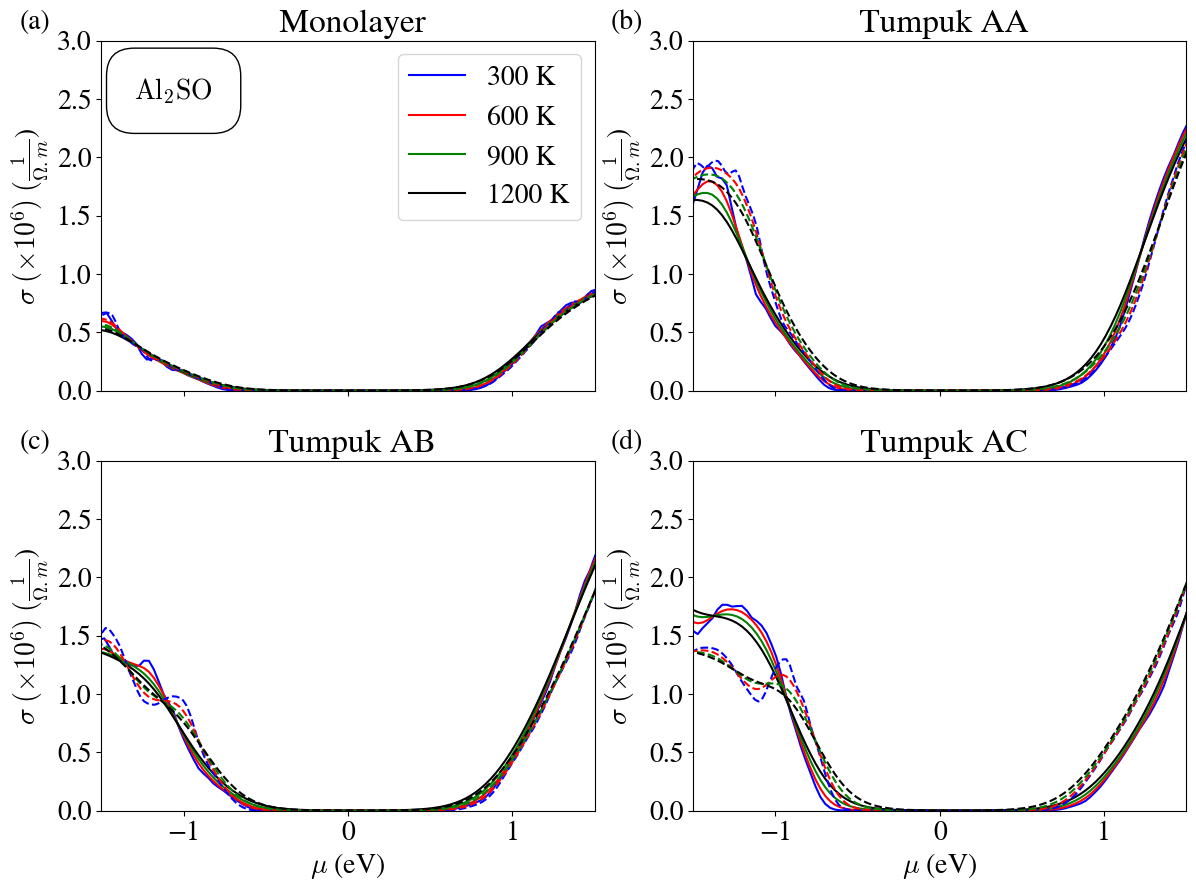

In [109]:
fig, axs = plt.subplots(2,2,figsize=(14,10),sharex=True)
axs[0][0].plot(X3_s_M_tvdw,Y3_s_M_tvdw*tau*1e-6 , color ='blue', label='300 K')
axs[0][0].plot(X6_s_M_tvdw,Y6_s_M_tvdw*tau*1e-6 , color ='red', label='600 K')
axs[0][0].plot(X9_s_M_tvdw,Y9_s_M_tvdw*tau*1e-6 , color='green', label ='900 K')
axs[0][0].plot(X12_s_M_tvdw,Y12_s_M_tvdw*tau*1e-6 , color='black', label ='1200 K')
axs[0][0].plot(X3_s_M_vdw,Y3_s_M_vdw*tau*1e-6 , color ='blue', linestyle='dashed')
axs[0][0].plot(X6_s_M_vdw,Y6_s_M_vdw*tau*1e-6 , color ='red', linestyle='dashed')
axs[0][0].plot(X9_s_M_vdw,Y9_s_M_vdw*tau*1e-6 , color='green', linestyle='dashed')
axs[0][0].plot(X12_s_M_vdw,Y12_s_M_vdw*tau*1e-6 , color='black', linestyle='dashed')
axs[0][0].set_title(r' Monolayer')
axs[0][0].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
# # axs[0][0].set_xlabel(r'$\mu$ (eV)' )
axs[0][0].set_xlim([-1.5, 1.5])
axs[0][0].set_ylim([0,3])
axs[0][0].legend()
axs[0][0].text(-1.3,2.5,r'$\mathrm{Al}_{2}\mathrm{SO}$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

axs[0][1].plot(X3_s_AA_tvdw,Y3_s_AA_tvdw*tau*1e-6 , color ='blue', label='300 K')
axs[0][1].plot(X6_s_AA_tvdw,Y6_s_AA_tvdw*tau*1e-6 , color ='red', label='600 K')
axs[0][1].plot(X9_s_AA_tvdw,Y9_s_AA_tvdw*tau*1e-6 , color='green', label ='900 K')
axs[0][1].plot(X12_s_AA_tvdw,Y12_s_AA_tvdw*tau*1e-6 , color='black', label ='1200 K')
axs[0][1].plot(X3_s_AA_vdw,Y3_s_AA_vdw*tau*1e-6 , color ='blue', linestyle='dashed')
axs[0][1].plot(X6_s_AA_vdw,Y6_s_AA_vdw*tau*1e-6 , color ='red', linestyle='dashed')
axs[0][1].plot(X9_s_AA_vdw,Y9_s_AA_vdw*tau*1e-6 , color='green', linestyle='dashed')
axs[0][1].plot(X12_s_AA_vdw,Y12_s_AA_vdw*tau*1e-6 , color='black', linestyle='dashed')
axs[0][1].set_title(r' Tumpuk AA')
axs[0][1].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
# # axs[0][1].set_xlabel(r'$\mu$ (eV)' )
axs[0][1].set_xlim([-1.5, 1.5])
axs[0][1].set_ylim([0,3])

axs[1][0].plot(X3_s_AB_tvdw,Y3_s_AB_tvdw*tau*1e-6 , color ='blue', label='300 K')
axs[1][0].plot(X6_s_AB_tvdw,Y6_s_AB_tvdw*tau*1e-6 , color ='red', label='600 K')
axs[1][0].plot(X9_s_AB_tvdw,Y9_s_AB_tvdw*tau*1e-6 , color='green', label ='900 K')
axs[1][0].plot(X12_s_AB_tvdw,Y12_s_AB_tvdw*tau*1e-6 , color='black', label ='1200 K')
axs[1][0].plot(X3_s_AB_vdw,Y3_s_AB_vdw*tau*1e-6 , color ='blue', linestyle='dashed')
axs[1][0].plot(X6_s_AB_vdw,Y6_s_AB_vdw*tau*1e-6 , color ='red', linestyle='dashed')
axs[1][0].plot(X9_s_AB_vdw,Y9_s_AB_vdw*tau*1e-6 , color='green', linestyle='dashed')
axs[1][0].plot(X12_s_AB_vdw,Y12_s_AB_vdw*tau*1e-6 , color='black', linestyle='dashed')
axs[1][0].set_title(r' Tumpuk AB')
axs[1][0].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
axs[1][0].set_xlabel(r'$\mu$ (eV)' )
axs[1][0].set_xlim([-1.5, 1.5])
axs[1][0].set_ylim([0,3])

axs[1][1].plot(X3_s_AC_tvdw,Y3_s_AC_tvdw*tau*1e-6 , color ='blue', label='300 K')
axs[1][1].plot(X6_s_AC_tvdw,Y6_s_AC_tvdw*tau*1e-6 , color ='red', label='600 K')
axs[1][1].plot(X9_s_AC_tvdw,Y9_s_AC_tvdw*tau*1e-6 , color='green', label ='900 K')
axs[1][1].plot(X12_s_AC_tvdw,Y12_s_AC_tvdw*tau*1e-6 , color='black', label ='1200 K')
axs[1][1].plot(X3_s_AC_vdw,Y3_s_AC_vdw*tau*1e-6 , color ='blue', linestyle='dashed')
axs[1][1].plot(X6_s_AC_vdw,Y6_s_AC_vdw*tau*1e-6 , color ='red', linestyle='dashed')
axs[1][1].plot(X9_s_AC_vdw,Y9_s_AC_vdw*tau*1e-6 , color='green', linestyle='dashed')
axs[1][1].plot(X12_s_AC_vdw,Y12_s_AC_vdw*tau*1e-6 , color='black', linestyle='dashed')
axs[1][1].set_title(r' Tumpuk AC')
axs[1][1].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
axs[1][1].set_xlabel(r'$\mu$ (eV)' )
axs[1][1].set_xlim([-1.5, 1.5])
axs[1][1].set_ylim([0,3])
axs[0][0].text(-2.0, 3.1,'(a)')
axs[0][1].text(-2.0, 3.1,'(b)')
axs[1][0].text(-2.0, 3.1,'(c)')
axs[1][1].text(-2.0, 3.1,'(d)')
# plt.savefig('sigma_al2so.pdf', bbox_inches='tight')
plt.show()

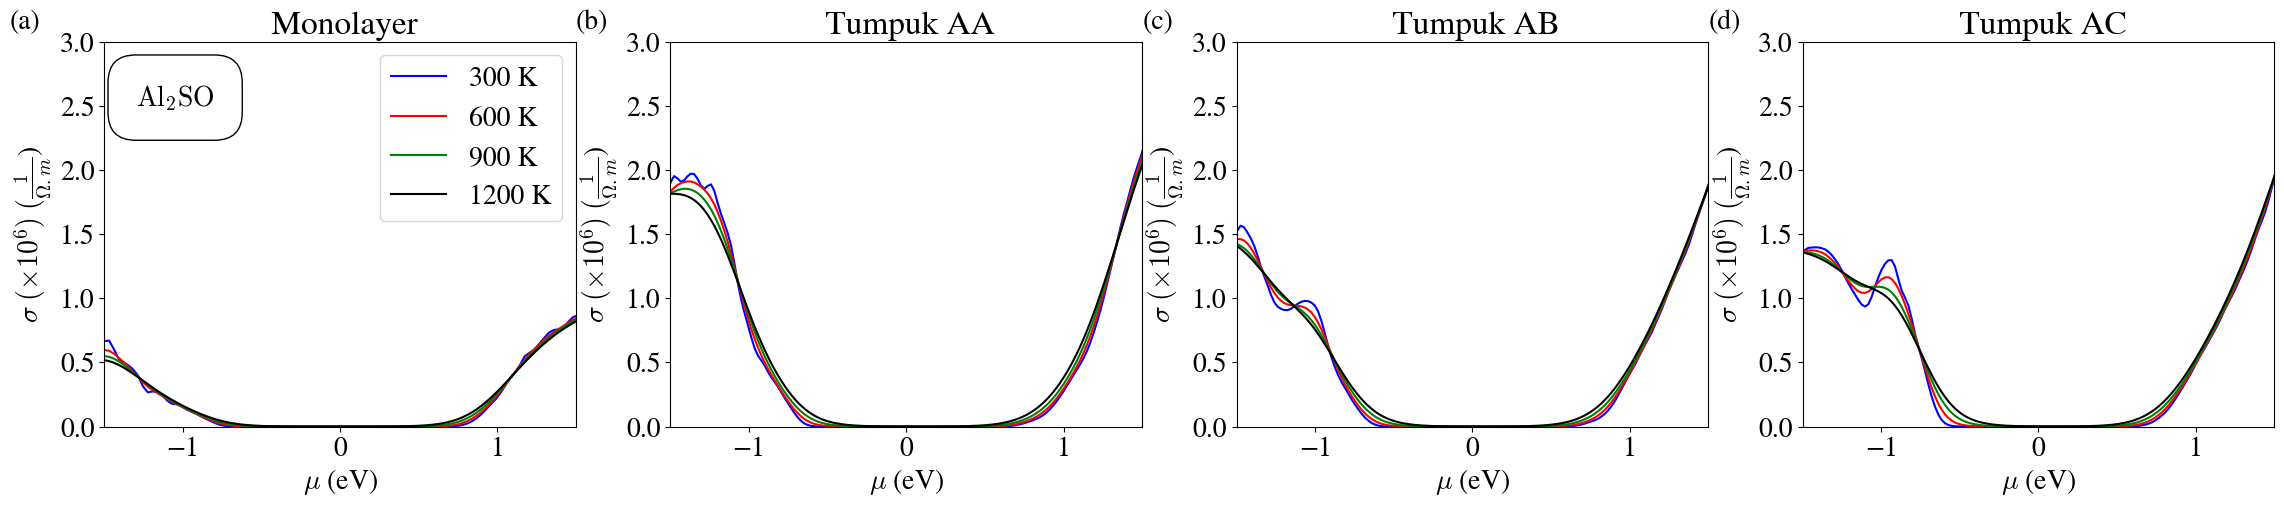

In [110]:
fig, axs = plt.subplots(1,4,figsize=(28,5))
axs[0].plot(X3_s_M_tvdw,Y3_s_M_tvdw*tau*1e-6 , color ='blue', label='300 K')
axs[0].plot(X6_s_M_tvdw,Y6_s_M_tvdw*tau*1e-6 , color ='red', label='600 K')
axs[0].plot(X9_s_M_tvdw,Y9_s_M_tvdw*tau*1e-6 , color='green', label ='900 K')
axs[0].plot(X12_s_M_tvdw,Y12_s_M_tvdw*tau*1e-6 , color='black', label ='1200 K')
axs[0].set_title(r' Monolayer')
axs[0].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
axs[0].set_xlabel(r'$\mu$ (eV)') 
axs[0].set_xlim([-1.5, 1.5])
axs[0].set_ylim([0,3])
axs[0].legend()
axs[0].text(-1.3,2.5,r'$\mathrm{Al}_{2}\mathrm{SO}$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))


axs[1].plot(X3_s_AA_vdw,Y3_s_AA_vdw*tau*1e-6 , color ='blue', linestyle='solid')
axs[1].plot(X6_s_AA_vdw,Y6_s_AA_vdw*tau*1e-6 , color ='red', linestyle='solid')
axs[1].plot(X9_s_AA_vdw,Y9_s_AA_vdw*tau*1e-6 , color='green', linestyle='solid')
axs[1].plot(X12_s_AA_vdw,Y12_s_AA_vdw*tau*1e-6 , color='black', linestyle='solid')
axs[1].set_title(r' Tumpuk AA')
axs[1].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
axs[1].set_xlabel(r'$\mu$ (eV)' )
axs[1].set_xlim([-1.5, 1.5])
axs[1].set_ylim([0,3])

axs[2].plot(X3_s_AB_vdw,Y3_s_AB_vdw*tau*1e-6 , color ='blue', linestyle='solid')
axs[2].plot(X6_s_AB_vdw,Y6_s_AB_vdw*tau*1e-6 , color ='red', linestyle='solid')
axs[2].plot(X9_s_AB_vdw,Y9_s_AB_vdw*tau*1e-6 , color='green', linestyle='solid')
axs[2].plot(X12_s_AB_vdw,Y12_s_AB_vdw*tau*1e-6 , color='black', linestyle='solid')
axs[2].set_title(r' Tumpuk AB')
axs[2].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
axs[2].set_xlabel(r'$\mu$ (eV)' )
axs[2].set_xlim([-1.5, 1.5])
axs[2].set_ylim([0,3])

axs[3].plot(X3_s_AC_vdw,Y3_s_AC_vdw*tau*1e-6 , color ='blue', linestyle='solid')
axs[3].plot(X6_s_AC_vdw,Y6_s_AC_vdw*tau*1e-6 , color ='red', linestyle='solid')
axs[3].plot(X9_s_AC_vdw,Y9_s_AC_vdw*tau*1e-6 , color='green', linestyle='solid')
axs[3].plot(X12_s_AC_vdw,Y12_s_AC_vdw*tau*1e-6 , color='black', linestyle='solid')
axs[3].set_title(r' Tumpuk AC')
axs[3].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
axs[3].set_xlabel(r'$\mu$ (eV)' )
axs[3].set_xlim([-1.5, 1.5])
axs[3].set_ylim([0,3])

axs[0].text(-2.1, 3.1,'(a)')
axs[1].text(-2.1, 3.1,'(b)')
axs[2].text(-2.1, 3.1,'(c)')
axs[3].text(-2.1, 3.1,'(d)')
plt.savefig('sigma_al2so_ppt.jpeg', bbox_inches='tight')
plt.show()

In [111]:
# Y12_s_M_tvdw < Y12_s_AA_tvdw

In [112]:
# # data konduktivitas termal
# X3_kappa=datM_tvdw300.iloc[:,0]*13.6057-E_Fermi
# Y3_kappa=datM_tvdw300.iloc[:,7]#1e-15
# X6_kappa=datM_tvdw600.iloc[:,0]*13.6057-E_Fermi
# Y6_kappa=datM_tvdw600.iloc[:,7]#1e-15
# X9_kappa=datM_tvdw900.iloc[:,0]*13.6057-E_Fermi
# Y9_kappa=datM_tvdw900.iloc[:,7]#1e-15
# X12_kappa=datM_tvdw1200.iloc[:,0]*13.6057-E_Fermi
# Y12_kappa=datM_tvdw1200.iloc[:,7]#1e-15

In [113]:
#data konduktivitas termal
X3_k_M_tvdw=datM_tvdw300.iloc[:,0]*13.6057-E_FermiM_tvdw
Y3_k_M_tvdw=datM_tvdw300.iloc[:,7]
X6_k_M_tvdw=datM_tvdw600.iloc[:,0]*13.6057-E_FermiM_tvdw
Y6_k_M_tvdw=datM_tvdw600.iloc[:,7]
X9_k_M_tvdw=datM_tvdw900.iloc[:,0]*13.6057-E_FermiM_tvdw
Y9_k_M_tvdw=datM_tvdw900.iloc[:,7]
X12_k_M_tvdw=datM_tvdw1200.iloc[:,0]*13.6057-E_FermiM_tvdw
Y12_k_M_tvdw=datM_tvdw1200.iloc[:,7]

X3_k_AA_tvdw=datAA_tvdw300.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y3_k_AA_tvdw=datAA_tvdw300.iloc[:,7]
X6_k_AA_tvdw=datAA_tvdw600.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y6_k_AA_tvdw=datAA_tvdw600.iloc[:,7]
X9_k_AA_tvdw=datAA_tvdw900.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y9_k_AA_tvdw=datAA_tvdw900.iloc[:,7]
X12_k_AA_tvdw=datAA_tvdw1200.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y12_k_AA_tvdw=datAA_tvdw1200.iloc[:,7]

X3_k_AB_tvdw=datAB_tvdw300.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y3_k_AB_tvdw=datAB_tvdw300.iloc[:,7]
X6_k_AB_tvdw=datAB_tvdw600.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y6_k_AB_tvdw=datAB_tvdw600.iloc[:,7]
X9_k_AB_tvdw=datAB_tvdw900.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y9_k_AB_tvdw=datAB_tvdw900.iloc[:,7]
X12_k_AB_tvdw=datAB_tvdw1200.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y12_k_AB_tvdw=datAB_tvdw1200.iloc[:,7]

X3_k_AC_tvdw=datAC_tvdw300.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y3_k_AC_tvdw=datAC_tvdw300.iloc[:,7]
X6_k_AC_tvdw=datAC_tvdw600.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y6_k_AC_tvdw=datAC_tvdw600.iloc[:,7]
X9_k_AC_tvdw=datAC_tvdw900.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y9_k_AC_tvdw=datAC_tvdw900.iloc[:,7]
X12_k_AC_tvdw=datAC_tvdw1200.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y12_k_AC_tvdw=datAC_tvdw1200.iloc[:,7]

X3_k_M_vdw=datM_vdw300.iloc[:,0]*13.6057-E_FermiM_vdw
Y3_k_M_vdw=datM_vdw300.iloc[:,7]
X6_k_M_vdw=datM_vdw600.iloc[:,0]*13.6057-E_FermiM_vdw
Y6_k_M_vdw=datM_vdw600.iloc[:,7]
X9_k_M_vdw=datM_vdw900.iloc[:,0]*13.6057-E_FermiM_vdw
Y9_k_M_vdw=datM_vdw900.iloc[:,7]
X12_k_M_vdw=datM_vdw1200.iloc[:,0]*13.6057-E_FermiM_vdw
Y12_k_M_vdw=datM_vdw1200.iloc[:,7]

X3_k_AA_vdw=datAA_vdw300.iloc[:,0]*13.6057-E_FermiAA_vdw
Y3_k_AA_vdw=datAA_vdw300.iloc[:,7]
X6_k_AA_vdw=datAA_vdw600.iloc[:,0]*13.6057-E_FermiAA_vdw
Y6_k_AA_vdw=datAA_vdw600.iloc[:,7]
X9_k_AA_vdw=datAA_vdw900.iloc[:,0]*13.6057-E_FermiAA_vdw
Y9_k_AA_vdw=datAA_vdw900.iloc[:,7]
X12_k_AA_vdw=datAA_vdw1200.iloc[:,0]*13.6057-E_FermiAA_vdw
Y12_k_AA_vdw=datAA_vdw1200.iloc[:,7]

X3_k_AB_vdw=datAB_vdw300.iloc[:,0]*13.6057-E_FermiAB_vdw
Y3_k_AB_vdw=datAB_vdw300.iloc[:,7]
X6_k_AB_vdw=datAB_vdw600.iloc[:,0]*13.6057-E_FermiAB_vdw
Y6_k_AB_vdw=datAB_vdw600.iloc[:,7]
X9_k_AB_vdw=datAB_vdw900.iloc[:,0]*13.6057-E_FermiAB_vdw
Y9_k_AB_vdw=datAB_vdw900.iloc[:,7]
X12_k_AB_vdw=datAB_vdw1200.iloc[:,0]*13.6057-E_FermiAB_vdw
Y12_k_AB_vdw=datAB_vdw1200.iloc[:,7]

X3_k_AC_vdw=datAC_vdw300.iloc[:,0]*13.6057-E_FermiAC_vdw
Y3_k_AC_vdw=datAC_vdw300.iloc[:,7]
X6_k_AC_vdw=datAC_vdw600.iloc[:,0]*13.6057-E_FermiAC_vdw
Y6_k_AC_vdw=datAC_vdw600.iloc[:,7]
X9_k_AC_vdw=datAC_vdw900.iloc[:,0]*13.6057-E_FermiAC_vdw
Y9_k_AC_vdw=datAC_vdw900.iloc[:,7]
X12_k_AC_vdw=datAC_vdw1200.iloc[:,0]*13.6057-E_FermiAC_vdw
Y12_k_AC_vdw=datAC_vdw1200.iloc[:,7]

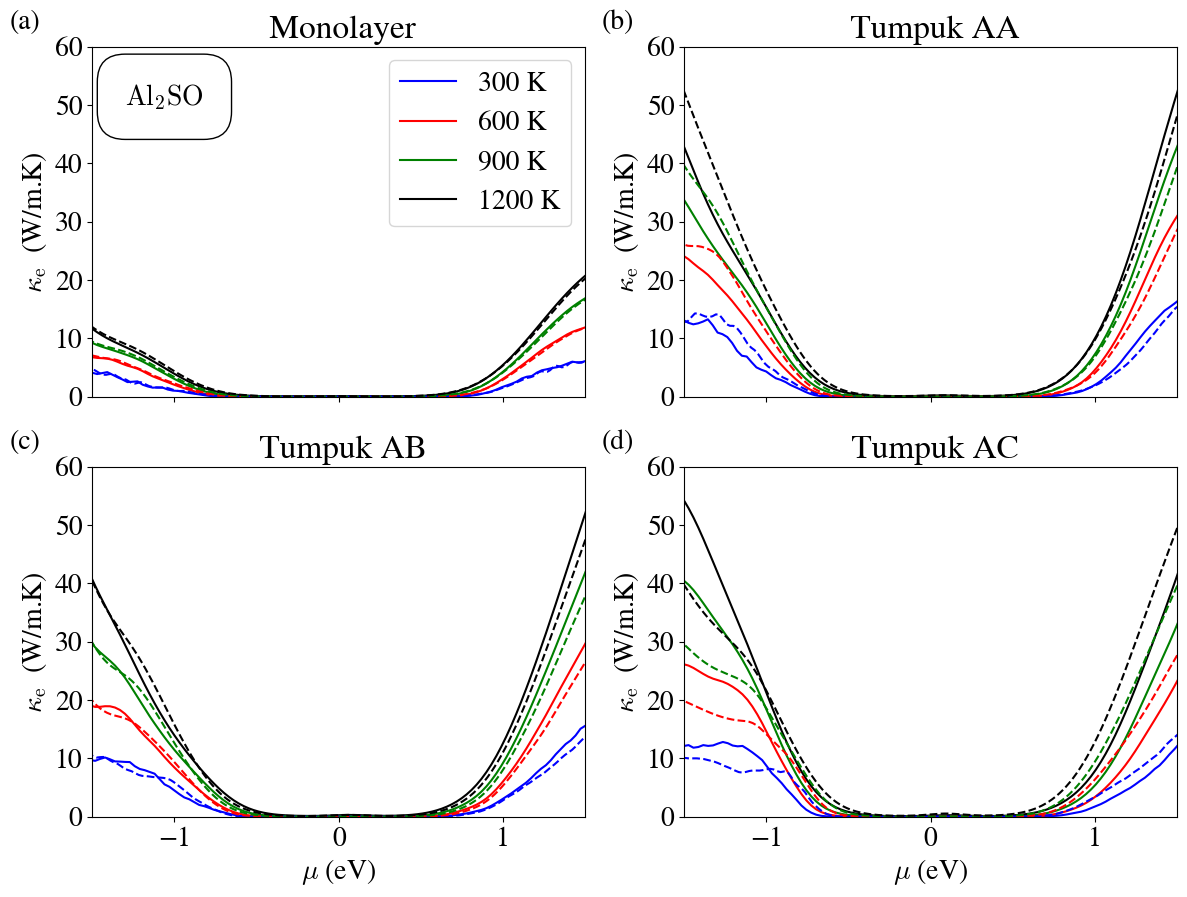

In [114]:
fig, axs = plt.subplots(2,2,figsize=(14,10),sharex=True)
axs[0][0].plot(X3_k_M_tvdw,Y3_k_M_tvdw*tau , color ='blue', label='300 K')
axs[0][0].plot(X6_k_M_tvdw,Y6_k_M_tvdw*tau , color ='red', label='600 K')
axs[0][0].plot(X9_k_M_tvdw,Y9_k_M_tvdw*tau , color='green', label ='900 K')
axs[0][0].plot(X12_k_M_tvdw,Y12_k_M_tvdw*tau , color='black', label ='1200 K')
axs[0][0].plot(X3_k_M_vdw,Y3_k_M_vdw*tau , color ='blue', linestyle='dashed')
axs[0][0].plot(X6_k_M_vdw,Y6_k_M_vdw*tau , color ='red', linestyle='dashed')
axs[0][0].plot(X9_k_M_vdw,Y9_k_M_vdw*tau , color='green', linestyle='dashed')
axs[0][0].plot(X12_k_M_vdw,Y12_k_M_vdw*tau , color='black', linestyle='dashed')
axs[0][0].set_title(r' Monolayer')
axs[0][0].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
# # axs[0][0].set_xlabel(r'$\mu$ (eV)' )
axs[0][0].set_xlim([-1.5, 1.5])
axs[0][0].set_ylim([0,60])
axs[0][0].legend()
axs[0][0].text(-1.3,50,r'$\mathrm{Al}_{2}\mathrm{SO}$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

axs[0][1].plot(X3_k_AA_tvdw,Y3_k_AA_tvdw*tau , color ='blue', label='300 K')
axs[0][1].plot(X6_k_AA_tvdw,Y6_k_AA_tvdw*tau , color ='red', label='600 K')
axs[0][1].plot(X9_k_AA_tvdw,Y9_k_AA_tvdw*tau , color='green', label ='900 K')
axs[0][1].plot(X12_k_AA_tvdw,Y12_k_AA_tvdw*tau , color='black', label ='1200 K')
axs[0][1].plot(X3_k_AA_vdw,Y3_k_AA_vdw*tau , color ='blue', linestyle='dashed')
axs[0][1].plot(X6_k_AA_vdw,Y6_k_AA_vdw*tau , color ='red', linestyle='dashed')
axs[0][1].plot(X9_k_AA_vdw,Y9_k_AA_vdw*tau , color='green', linestyle='dashed')
axs[0][1].plot(X12_k_AA_vdw,Y12_k_AA_vdw*tau , color='black', linestyle='dashed')
axs[0][1].set_title(r' Tumpuk AA')
axs[0][1].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
# # axs[0][1].set_xlabel(r'$\mu$ (eV)' )
axs[0][1].set_xlim([-1.5, 1.5])
axs[0][1].set_ylim([0,60])

axs[1][0].plot(X3_k_AB_tvdw,Y3_k_AB_tvdw*tau , color ='blue', label='300 K')
axs[1][0].plot(X6_k_AB_tvdw,Y6_k_AB_tvdw*tau , color ='red', label='600 K')
axs[1][0].plot(X9_k_AB_tvdw,Y9_k_AB_tvdw*tau , color='green', label ='900 K')
axs[1][0].plot(X12_k_AB_tvdw,Y12_k_AB_tvdw*tau, color='black', label ='1200 K')
axs[1][0].plot(X3_k_AB_vdw,Y3_k_AB_vdw*tau , color ='blue', linestyle='dashed')
axs[1][0].plot(X6_k_AB_vdw,Y6_k_AB_vdw*tau , color ='red', linestyle='dashed')
axs[1][0].plot(X9_k_AB_vdw,Y9_k_AB_vdw*tau , color='green', linestyle='dashed')
axs[1][0].plot(X12_k_AB_vdw,Y12_k_AB_vdw*tau, color='black', linestyle='dashed')
axs[1][0].set_title(r' Tumpuk AB')
axs[1][0].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
axs[1][0].set_xlabel(r'$\mu$ (eV)' )
axs[1][0].set_xlim([-1.5, 1.5])
axs[1][0].set_ylim([0,60])

axs[1][1].plot(X3_k_AC_tvdw,Y3_k_AC_tvdw*tau , color ='blue', label='300 K')
axs[1][1].plot(X6_k_AC_tvdw,Y6_k_AC_tvdw*tau , color ='red', label='600 K')
axs[1][1].plot(X9_k_AC_tvdw,Y9_k_AC_tvdw*tau , color='green', label ='900 K')
axs[1][1].plot(X12_k_AC_tvdw,Y12_k_AC_tvdw*tau, color='black', label ='1200 K')
axs[1][1].plot(X3_k_AC_vdw,Y3_k_AC_vdw*tau , color ='blue', linestyle='dashed')
axs[1][1].plot(X6_k_AC_vdw,Y6_k_AC_vdw*tau , color ='red', linestyle='dashed')
axs[1][1].plot(X9_k_AC_vdw,Y9_k_AC_vdw*tau , color='green', linestyle='dashed')
axs[1][1].plot(X12_k_AC_vdw,Y12_k_AC_vdw*tau, color='black', linestyle='dashed')
axs[1][1].set_title(r' Tumpuk AC')
axs[1][1].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
axs[1][1].set_xlabel(r'$\mu$ (eV)' )
axs[1][1].set_xlim([-1.5, 1.5])
axs[1][1].set_ylim([0,60])
axs[0][0].text(-2.0, 63,'(a)')
axs[0][1].text(-2.0, 63,'(b)')
axs[1][0].text(-2.0, 63,'(c)')
axs[1][1].text(-2.0, 63,'(d)')
plt.savefig('kappa_e_al2so.pdf', bbox_inches='tight')
plt.show()

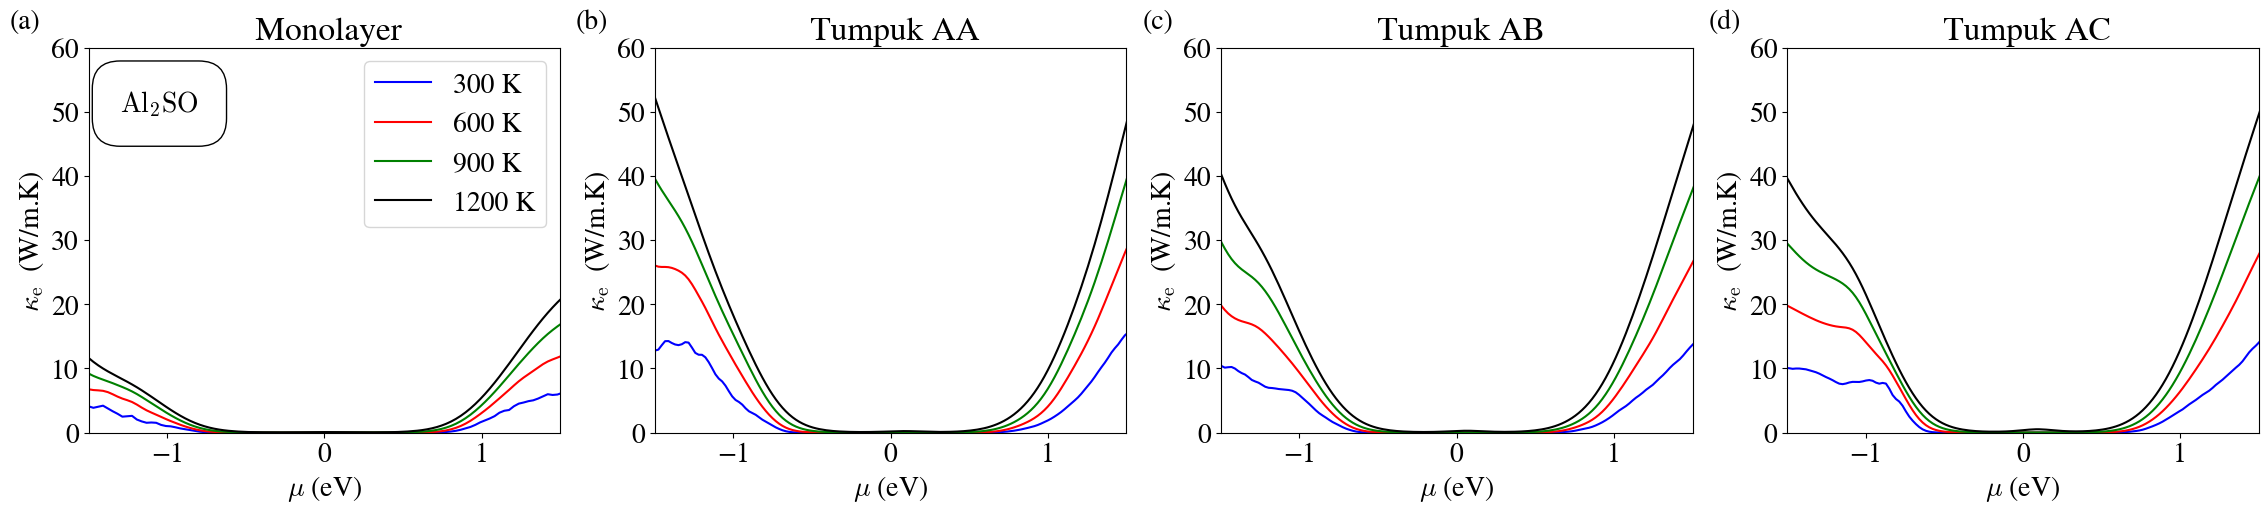

In [115]:
fig, axs = plt.subplots(1,4,figsize=(28,5))
axs[0].plot(X3_k_M_tvdw,Y3_k_M_tvdw*tau , color ='blue', label='300 K')
axs[0].plot(X6_k_M_tvdw,Y6_k_M_tvdw*tau , color ='red', label='600 K')
axs[0].plot(X9_k_M_tvdw,Y9_k_M_tvdw*tau , color='green', label ='900 K')
axs[0].plot(X12_k_M_tvdw,Y12_k_M_tvdw*tau , color='black', label ='1200 K')
axs[0].set_title(r' Monolayer')
axs[0].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
axs[0].set_xlabel(r'$\mu$ (eV)' )
axs[0].set_xlim([-1.5, 1.5])
axs[0].set_ylim([0,60])
axs[0].legend()
axs[0].text(-1.3,50,r'$\mathrm{Al}_{2}\mathrm{SO}$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

axs[1].plot(X3_k_AA_vdw,Y3_k_AA_vdw*tau , color ='blue', linestyle='solid')
axs[1].plot(X6_k_AA_vdw,Y6_k_AA_vdw*tau , color ='red', linestyle='solid')
axs[1].plot(X9_k_AA_vdw,Y9_k_AA_vdw*tau , color='green', linestyle='solid')
axs[1].plot(X12_k_AA_vdw,Y12_k_AA_vdw*tau , color='black', linestyle='solid')
axs[1].set_title(r' Tumpuk AA')
axs[1].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
axs[1].set_xlabel(r'$\mu$ (eV)' )
axs[1].set_xlim([-1.5, 1.5])
axs[1].set_ylim([0,60])


axs[2].plot(X3_k_AB_vdw,Y3_k_AB_vdw*tau , color ='blue', linestyle='solid')
axs[2].plot(X6_k_AB_vdw,Y6_k_AB_vdw*tau , color ='red', linestyle='solid')
axs[2].plot(X9_k_AB_vdw,Y9_k_AB_vdw*tau , color='green', linestyle='solid')
axs[2].plot(X12_k_AB_vdw,Y12_k_AB_vdw*tau, color='black', linestyle='solid')
axs[2].set_title(r' Tumpuk AB')
axs[2].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
axs[2].set_xlabel(r'$\mu$ (eV)' )
axs[2].set_xlim([-1.5, 1.5])
axs[2].set_ylim([0,60])


axs[3].plot(X3_k_AC_vdw,Y3_k_AC_vdw*tau , color ='blue', linestyle='solid')
axs[3].plot(X6_k_AC_vdw,Y6_k_AC_vdw*tau , color ='red', linestyle='solid')
axs[3].plot(X9_k_AC_vdw,Y9_k_AC_vdw*tau , color='green', linestyle='solid')
axs[3].plot(X12_k_AC_vdw,Y12_k_AC_vdw*tau, color='black', linestyle='solid')
axs[3].set_title(r' Tumpuk AC')
axs[3].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
axs[3].set_xlabel(r'$\mu$ (eV)' )
axs[3].set_xlim([-1.5, 1.5])
axs[3].set_ylim([0,60])
axs[0].text(-2.0, 63,'(a)')
axs[1].text(-2.0, 63,'(b)')
axs[2].text(-2.0, 63,'(c)')
axs[3].text(-2.0, 63,'(d)')
plt.savefig('kappa_e_al2so_ppt.jpeg', bbox_inches='tight')
plt.show()

In [116]:
# data ZTe
X3_ZTe_M_tvdw=datM_tvdw300.iloc[:,0]*13.6057-E_FermiM_tvdw
Y3_ZTe_M_tvdw=(datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,5])*300*0.1/datM_tvdw300.iloc[:,7]
X6_ZTe_M_tvdw=datM_tvdw600.iloc[:,0]*13.6057-E_FermiM_tvdw
Y6_ZTe_M_tvdw=(datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,5])*600*0.1/datM_tvdw600.iloc[:,7]
X9_ZTe_M_tvdw=datM_tvdw900.iloc[:,0]*13.6057-E_FermiM_tvdw
Y9_ZTe_M_tvdw=(datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,5])*900*0.1/datM_tvdw900.iloc[:,7]
X12_ZTe_M_tvdw=datM_tvdw1200.iloc[:,0]*13.6057-E_FermiM_tvdw
Y12_ZTe_M_tvdw=(datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,5])*1200*0.1/datM_tvdw1200.iloc[:,7]

X3_ZTe_AA_tvdw=datAA_tvdw300.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y3_ZTe_AA_tvdw=(datAA_tvdw300.iloc[:,4]*datAA_tvdw300.iloc[:,4]*datAA_tvdw300.iloc[:,5])*300*0.1/datAA_tvdw300.iloc[:,7]
X6_ZTe_AA_tvdw=datAA_tvdw600.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y6_ZTe_AA_tvdw=(datAA_tvdw600.iloc[:,4]*datAA_tvdw600.iloc[:,4]*datAA_tvdw600.iloc[:,5])*600*0.1/datAA_tvdw600.iloc[:,7]
X9_ZTe_AA_tvdw=datAA_tvdw900.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y9_ZTe_AA_tvdw=(datAA_tvdw900.iloc[:,4]*datAA_tvdw900.iloc[:,4]*datAA_tvdw900.iloc[:,5])*900*0.1/datAA_tvdw900.iloc[:,7]
X12_ZTe_AA_tvdw=datAA_tvdw1200.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y12_ZTe_AA_tvdw=(datAA_tvdw1200.iloc[:,4]*datAA_tvdw1200.iloc[:,4]*datAA_tvdw1200.iloc[:,5])*1200*0.1/datAA_tvdw1200.iloc[:,7]

X3_ZTe_AB_tvdw=datAB_tvdw300.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y3_ZTe_AB_tvdw=(datAB_tvdw300.iloc[:,4]*datAB_tvdw300.iloc[:,4]*datAB_tvdw300.iloc[:,5])*300*0.1/datAB_tvdw300.iloc[:,7]
X6_ZTe_AB_tvdw=datAB_tvdw600.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y6_ZTe_AB_tvdw=(datAB_tvdw600.iloc[:,4]*datAB_tvdw600.iloc[:,4]*datAB_tvdw600.iloc[:,5])*600*0.1/datAB_tvdw600.iloc[:,7]
X9_ZTe_AB_tvdw=datAB_tvdw900.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y9_ZTe_AB_tvdw=(datAB_tvdw900.iloc[:,4]*datAB_tvdw900.iloc[:,4]*datAB_tvdw900.iloc[:,5])*900*0.1/datAB_tvdw900.iloc[:,7]
X12_ZTe_AB_tvdw=datAB_tvdw1200.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y12_ZTe_AB_tvdw=(datAB_tvdw1200.iloc[:,4]*datAB_tvdw1200.iloc[:,4]*datAB_tvdw1200.iloc[:,5])*1200*0.1/datAB_tvdw1200.iloc[:,7]

X3_ZTe_AC_tvdw=datAC_tvdw300.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y3_ZTe_AC_tvdw=(datAC_tvdw300.iloc[:,4]*datAC_tvdw300.iloc[:,4]*datAC_tvdw300.iloc[:,5])*300*0.1/datAC_tvdw300.iloc[:,7]
X6_ZTe_AC_tvdw=datAC_tvdw600.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y6_ZTe_AC_tvdw=(datAC_tvdw600.iloc[:,4]*datAC_tvdw600.iloc[:,4]*datAC_tvdw600.iloc[:,5])*600*0.1/datAC_tvdw600.iloc[:,7]
X9_ZTe_AC_tvdw=datAC_tvdw900.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y9_ZTe_AC_tvdw=(datAC_tvdw900.iloc[:,4]*datAC_tvdw900.iloc[:,4]*datAC_tvdw900.iloc[:,5])*900*0.1/datAC_tvdw900.iloc[:,7]
X12_ZTe_AC_tvdw=datAC_tvdw1200.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y12_ZTe_AC_tvdw=(datAC_tvdw1200.iloc[:,4]*datAC_tvdw1200.iloc[:,4]*datAC_tvdw1200.iloc[:,5])*1200*0.1/datAC_tvdw1200.iloc[:,7]

X3_ZTe_M_vdw=datM_vdw300.iloc[:,0]*13.6057-E_FermiM_vdw
Y3_ZTe_M_vdw=(datM_vdw300.iloc[:,4]*datM_vdw300.iloc[:,4]*datM_vdw300.iloc[:,5])*300*0.1/datM_vdw300.iloc[:,7]
X6_ZTe_M_vdw=datM_vdw600.iloc[:,0]*13.6057-E_FermiM_vdw
Y6_ZTe_M_vdw=(datM_vdw600.iloc[:,4]*datM_vdw600.iloc[:,4]*datM_vdw600.iloc[:,5])*600*0.1/datM_vdw600.iloc[:,7]
X9_ZTe_M_vdw=datM_vdw900.iloc[:,0]*13.6057-E_FermiM_vdw
Y9_ZTe_M_vdw=(datM_vdw900.iloc[:,4]*datM_vdw900.iloc[:,4]*datM_vdw900.iloc[:,5])*900*0.1/datM_vdw900.iloc[:,7]
X12_ZTe_M_vdw=datM_vdw1200.iloc[:,0]*13.6057-E_FermiM_vdw
Y12_ZTe_M_vdw=(datM_vdw1200.iloc[:,4]*datM_vdw1200.iloc[:,4]*datM_vdw1200.iloc[:,5])*1200*0.1/datM_vdw1200.iloc[:,7]

X3_ZTe_AA_vdw=datAA_vdw300.iloc[:,0]*13.6057-E_FermiAA_vdw
Y3_ZTe_AA_vdw=(datAA_vdw300.iloc[:,4]*datAA_vdw300.iloc[:,4]*datAA_vdw300.iloc[:,5])*300*0.1/datAA_vdw300.iloc[:,7]
X6_ZTe_AA_vdw=datAA_vdw600.iloc[:,0]*13.6057-E_FermiAA_vdw
Y6_ZTe_AA_vdw=(datAA_vdw600.iloc[:,4]*datAA_vdw600.iloc[:,4]*datAA_vdw600.iloc[:,5])*600*0.1/datAA_vdw600.iloc[:,7]
X9_ZTe_AA_vdw=datAA_vdw900.iloc[:,0]*13.6057-E_FermiAA_vdw
Y9_ZTe_AA_vdw=(datAA_vdw900.iloc[:,4]*datAA_vdw900.iloc[:,4]*datAA_vdw900.iloc[:,5])*900*0.1/datAA_vdw900.iloc[:,7]
X12_ZTe_AA_vdw=datAA_vdw1200.iloc[:,0]*13.6057-E_FermiAA_vdw
Y12_ZTe_AA_vdw=(datAA_vdw1200.iloc[:,4]*datAA_vdw1200.iloc[:,4]*datAA_vdw1200.iloc[:,5])*1200*0.1/datAA_vdw1200.iloc[:,7]

X3_ZTe_AB_vdw=datAB_vdw300.iloc[:,0]*13.6057-E_FermiAB_vdw
Y3_ZTe_AB_vdw=(datAB_vdw300.iloc[:,4]*datAB_vdw300.iloc[:,4]*datAB_vdw300.iloc[:,5])*300*0.1/datAB_vdw300.iloc[:,7]
X6_ZTe_AB_vdw=datAB_vdw600.iloc[:,0]*13.6057-E_FermiAB_vdw
Y6_ZTe_AB_vdw=(datAB_vdw600.iloc[:,4]*datAB_vdw600.iloc[:,4]*datAB_vdw600.iloc[:,5])*600*0.1/datAB_vdw600.iloc[:,7]
X9_ZTe_AB_vdw=datAB_vdw900.iloc[:,0]*13.6057-E_FermiAB_vdw
Y9_ZTe_AB_vdw=(datAB_vdw900.iloc[:,4]*datAB_vdw900.iloc[:,4]*datAB_vdw900.iloc[:,5])*900*0.1/datAB_vdw900.iloc[:,7]
X12_ZTe_AB_vdw=datAB_vdw1200.iloc[:,0]*13.6057-E_FermiAB_vdw
Y12_ZTe_AB_vdw=(datAB_vdw1200.iloc[:,4]*datAB_vdw1200.iloc[:,4]*datAB_vdw1200.iloc[:,5])*1200*0.1/datAB_vdw1200.iloc[:,7]

X3_ZTe_AC_vdw=datAC_vdw300.iloc[:,0]*13.6057-E_FermiAC_vdw
Y3_ZTe_AC_vdw=(datAC_vdw300.iloc[:,4]*datAC_vdw300.iloc[:,4]*datAC_vdw300.iloc[:,5])*300*0.1/datAC_vdw300.iloc[:,7]
X6_ZTe_AC_vdw=datAC_vdw600.iloc[:,0]*13.6057-E_FermiAC_vdw
Y6_ZTe_AC_vdw=(datAC_vdw600.iloc[:,4]*datAC_vdw600.iloc[:,4]*datAC_vdw600.iloc[:,5])*600*0.1/datAC_vdw600.iloc[:,7]
X9_ZTe_AC_vdw=datAC_vdw900.iloc[:,0]*13.6057-E_FermiAC_vdw
Y9_ZTe_AC_vdw=(datAC_vdw900.iloc[:,4]*datAC_vdw900.iloc[:,4]*datAC_vdw900.iloc[:,5])*900*0.1/datAC_vdw900.iloc[:,7]
X12_ZTe_AC_vdw=datAC_vdw1200.iloc[:,0]*13.6057-E_FermiAC_vdw
Y12_ZTe_AC_vdw=(datAC_vdw1200.iloc[:,4]*datAC_vdw1200.iloc[:,4]*datAC_vdw1200.iloc[:,5])*1200*0.1/datAC_vdw1200.iloc[:,7]

In [117]:
# axs[1][1].plot(X3_ZTe_AC_tvdw,Y3_ZTe_AC_tvdw, color ='blue', label='300 K')
# axs[1][1].plot(X6_ZTe_AC_tvdw,Y6_ZTe_AC_tvdw, color ='red', label='600 K')
# axs[1][1].plot(X9_ZTe_AC_tvdw,Y9_ZTe_AC_tvdw, color='green', label ='900 K')
# axs[1][1].plot(X12_ZTe_AC_tvdw,Y12_ZTe_AC_tvdw, color='black', label ='1200 K')
# axs[1][1].set_title(r'$ZT_\mathrm{e}$ of $Al_{2}S_{2}$ non-vdW')
# axs[1][1].set_ylabel(r'$ZT_\mathrm{e}$' )
# axs[1][1].set_xlabel(r'$\mu$ (eV)' )
# axs[1][1].set_xlim([-1.5, 1.5])
# axs[1][1].set_ylim([0,4])

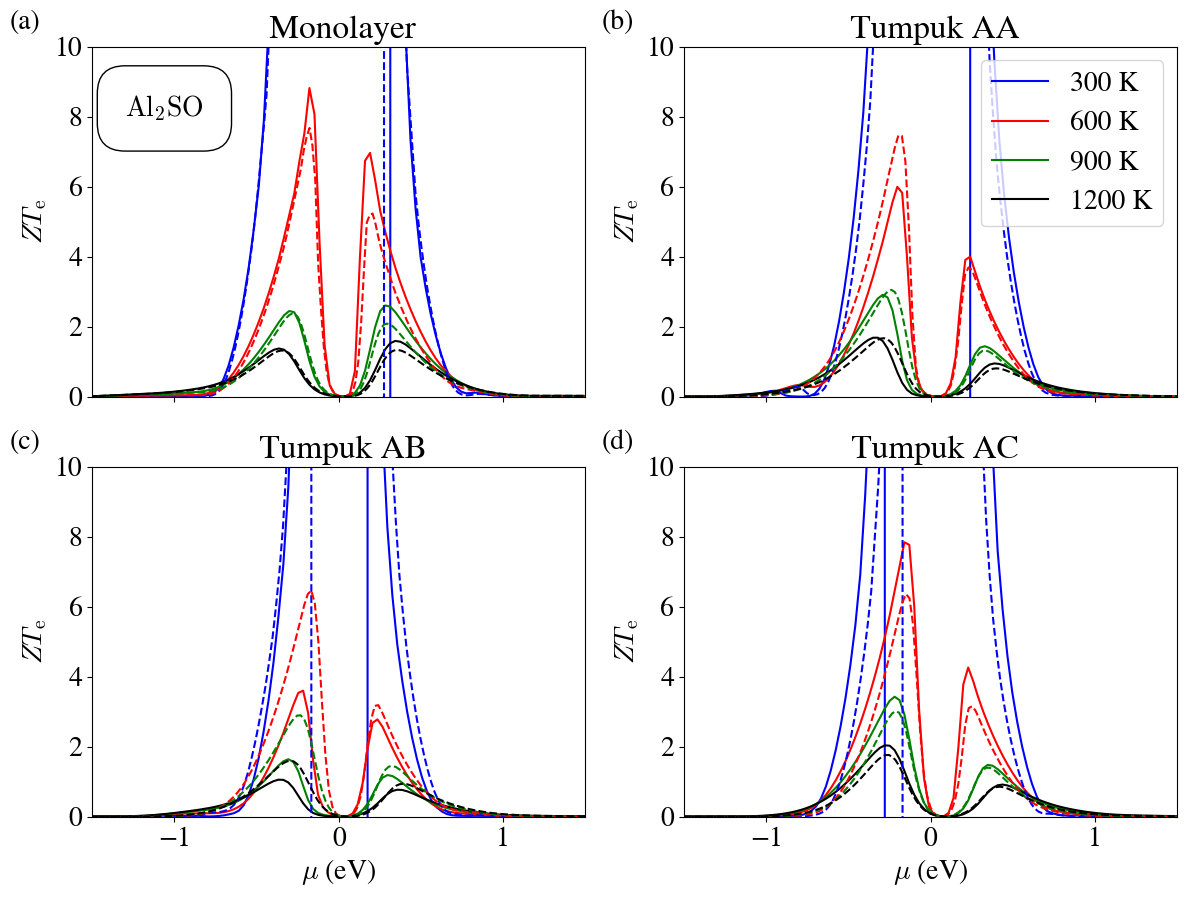

In [118]:
fig, axs = plt.subplots(2,2,figsize=(14,10),sharex=True)
axs[0][0].plot(X3_ZTe_M_tvdw,Y3_ZTe_M_tvdw, color ='blue', label='300 K')
axs[0][0].plot(X6_ZTe_M_tvdw,Y6_ZTe_M_tvdw, color ='red', label='600 K')
axs[0][0].plot(X9_ZTe_M_tvdw,Y9_ZTe_M_tvdw, color='green', label ='900 K')
axs[0][0].plot(X12_ZTe_M_tvdw,Y12_ZTe_M_tvdw, color='black', label ='1200 K')
axs[0][0].plot(X3_ZTe_M_vdw,Y3_ZTe_M_vdw, color ='blue', linestyle='dashed')
axs[0][0].plot(X6_ZTe_M_vdw,Y6_ZTe_M_vdw, color ='red', linestyle='dashed')
axs[0][0].plot(X9_ZTe_M_vdw,Y9_ZTe_M_vdw, color='green', linestyle='dashed')
axs[0][0].plot(X12_ZTe_M_vdw,Y12_ZTe_M_vdw, color='black', linestyle='dashed')
axs[0][0].set_title(r' Monolayer')
axs[0][0].set_ylabel(r'$ZT_\mathrm{e}$' )
# axs[0][0].set_xlabel(r'$\mu$ (eV)' )
axs[0][0].set_xlim([-1.5, 1.5])
axs[0][0].set_ylim([0,10])
# axs[0][0].legend()
axs[0][0].text(-1.3,8,r'$\mathrm{Al}_{2}\mathrm{SO}$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

axs[0][1].plot(X3_ZTe_AA_tvdw,Y3_ZTe_AA_tvdw, color ='blue', label='300 K')
axs[0][1].plot(X6_ZTe_AA_tvdw,Y6_ZTe_AA_tvdw, color ='red', label='600 K')
axs[0][1].plot(X9_ZTe_AA_tvdw,Y9_ZTe_AA_tvdw, color='green', label ='900 K')
axs[0][1].plot(X12_ZTe_AA_tvdw,Y12_ZTe_AA_tvdw, color='black', label ='1200 K')
axs[0][1].plot(X3_ZTe_AA_vdw,Y3_ZTe_AA_vdw, color ='blue', linestyle='dashed')
axs[0][1].plot(X6_ZTe_AA_vdw,Y6_ZTe_AA_vdw, color ='red', linestyle='dashed')
axs[0][1].plot(X9_ZTe_AA_vdw,Y9_ZTe_AA_vdw, color='green', linestyle='dashed')
axs[0][1].plot(X12_ZTe_AA_vdw,Y12_ZTe_AA_vdw, color='black', linestyle='dashed')
axs[0][1].set_title(r' Tumpuk AA')
axs[0][1].set_ylabel(r'$ZT_\mathrm{e}$' )
# axs[0][1].set_xlabel(r'$\mu$ (eV)' )
axs[0][1].set_xlim([-1.5, 1.5])
axs[0][1].set_ylim([0,10])
axs[0][1].legend()

axs[1][0].plot(X3_ZTe_AB_tvdw,Y3_ZTe_AB_tvdw, color ='blue', label='300 K')
axs[1][0].plot(X6_ZTe_AB_tvdw,Y6_ZTe_AB_tvdw, color ='red', label='600 K')
axs[1][0].plot(X9_ZTe_AB_tvdw,Y9_ZTe_AB_tvdw, color='green', label ='900 K')
axs[1][0].plot(X12_ZTe_AB_tvdw,Y12_ZTe_AB_tvdw, color='black', label ='1200 K')
axs[1][0].plot(X3_ZTe_AB_vdw,Y3_ZTe_AB_vdw, color ='blue', linestyle='dashed')
axs[1][0].plot(X6_ZTe_AB_vdw,Y6_ZTe_AB_vdw, color ='red', linestyle='dashed')
axs[1][0].plot(X9_ZTe_AB_vdw,Y9_ZTe_AB_vdw, color='green', linestyle='dashed')
axs[1][0].plot(X12_ZTe_AB_vdw,Y12_ZTe_AB_vdw, color='black', linestyle='dashed')
axs[1][0].set_title(r' Tumpuk AB')
axs[1][0].set_ylabel(r'$ZT_\mathrm{e}$' )
axs[1][0].set_xlabel(r'$\mu$ (eV)' )
axs[1][0].set_xlim([-1.5, 1.5])
axs[1][0].set_ylim([0,10])

axs[1][1].plot(X3_ZTe_AC_tvdw,Y3_ZTe_AC_tvdw, color ='blue', label='300 K')
axs[1][1].plot(X6_ZTe_AC_tvdw,Y6_ZTe_AC_tvdw, color ='red', label='600 K')
axs[1][1].plot(X9_ZTe_AC_tvdw,Y9_ZTe_AC_tvdw, color='green', label ='900 K')
axs[1][1].plot(X12_ZTe_AC_tvdw,Y12_ZTe_AC_tvdw, color='black', label ='1200 K')
axs[1][1].plot(X3_ZTe_AC_vdw,Y3_ZTe_AC_vdw, color ='blue', linestyle='dashed')
axs[1][1].plot(X6_ZTe_AC_vdw,Y6_ZTe_AC_vdw, color ='red', linestyle='dashed')
axs[1][1].plot(X9_ZTe_AC_vdw,Y9_ZTe_AC_vdw, color='green', linestyle='dashed')
axs[1][1].plot(X12_ZTe_AC_vdw,Y12_ZTe_AC_vdw, color='black', linestyle='dashed')
axs[1][1].set_title(r' Tumpuk AC')
axs[1][1].set_ylabel(r'$ZT_\mathrm{e}$' )
axs[1][1].set_xlabel(r'$\mu$ (eV)' )
axs[1][1].set_xlim([-1.5, 1.5])
axs[1][1].set_ylim([0,10])
axs[0][0].text(-2.0, 10.5,'(a)')
axs[0][1].text(-2.0, 10.5,'(b)')
axs[1][0].text(-2.0, 10.5,'(c)')
axs[1][1].text(-2.0, 10.5,'(d)')
plt.savefig('zte_al2so.pdf', bbox_inches='tight')
plt.show()

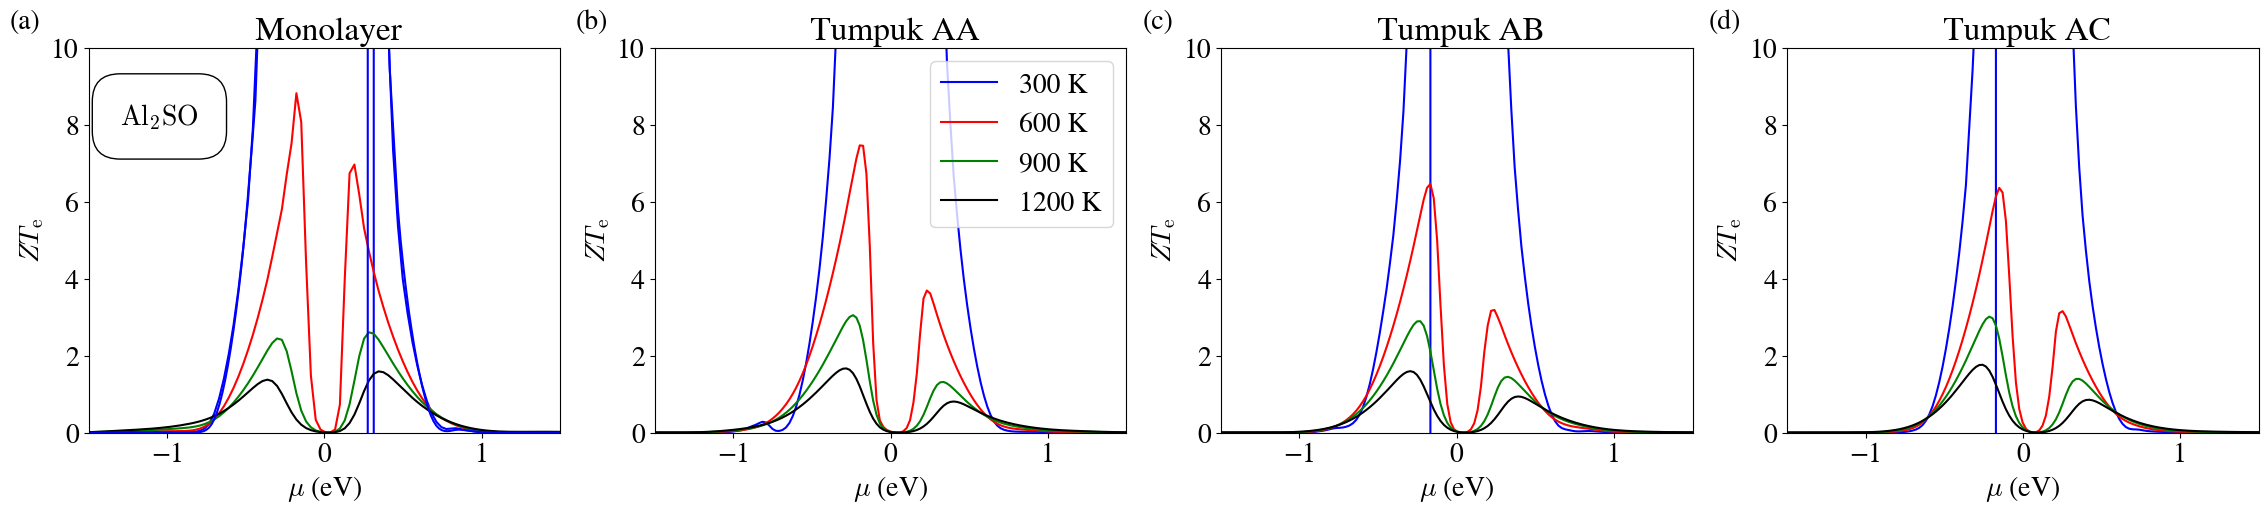

In [121]:
fig, axs = plt.subplots(1,4,figsize=(28,5))
axs[0].plot(X3_ZTe_M_tvdw,Y3_ZTe_M_tvdw, color ='blue', label='300 K')
axs[0].plot(X6_ZTe_M_tvdw,Y6_ZTe_M_tvdw, color ='red', label='600 K')
axs[0].plot(X9_ZTe_M_tvdw,Y9_ZTe_M_tvdw, color='green', label ='900 K')
axs[0].plot(X12_ZTe_M_tvdw,Y12_ZTe_M_tvdw, color='black', label ='1200 K')
axs[0].plot(X3_ZTe_M_vdw,Y3_ZTe_M_vdw, color ='blue', linestyle='solid')
axs[0].set_title(r' Monolayer')
axs[0].set_ylabel(r'$ZT_\mathrm{e}$' )
axs[0].set_xlabel(r'$\mu$ (eV)' )
axs[0].set_xlim([-1.5, 1.5])
axs[0].set_ylim([0,10])
# axs[0].legend()
axs[0].text(-1.3,8,r'$\mathrm{Al}_{2}\mathrm{SO}$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

axs[1].plot(X3_ZTe_AA_vdw,Y3_ZTe_AA_vdw, color ='blue', linestyle='solid',label='300 K')
axs[1].plot(X6_ZTe_AA_vdw,Y6_ZTe_AA_vdw, color ='red', linestyle='solid',label='600 K')
axs[1].plot(X9_ZTe_AA_vdw,Y9_ZTe_AA_vdw, color='green', linestyle='solid',label='900 K')
axs[1].plot(X12_ZTe_AA_vdw,Y12_ZTe_AA_vdw, color='black', linestyle='solid',label='1200 K')
axs[1].set_title(r' Tumpuk AA')
axs[1].set_ylabel(r'$ZT_\mathrm{e}$' )
axs[1].set_xlabel(r'$\mu$ (eV)' )
axs[1].set_xlim([-1.5, 1.5])
axs[1].set_ylim([0,10])
axs[1].legend()


axs[2].plot(X3_ZTe_AB_vdw,Y3_ZTe_AB_vdw, color ='blue', linestyle='solid')
axs[2].plot(X6_ZTe_AB_vdw,Y6_ZTe_AB_vdw, color ='red', linestyle='solid')
axs[2].plot(X9_ZTe_AB_vdw,Y9_ZTe_AB_vdw, color='green', linestyle='solid')
axs[2].plot(X12_ZTe_AB_vdw,Y12_ZTe_AB_vdw, color='black', linestyle='solid')
axs[2].set_title(r' Tumpuk AB')
axs[2].set_ylabel(r'$ZT_\mathrm{e}$' )
axs[2].set_xlabel(r'$\mu$ (eV)' )
axs[2].set_xlim([-1.5, 1.5])
axs[2].set_ylim([0,10])


axs[3].plot(X3_ZTe_AC_vdw,Y3_ZTe_AC_vdw, color ='blue', linestyle='solid')
axs[3].plot(X6_ZTe_AC_vdw,Y6_ZTe_AC_vdw, color ='red', linestyle='solid')
axs[3].plot(X9_ZTe_AC_vdw,Y9_ZTe_AC_vdw, color='green', linestyle='solid')
axs[3].plot(X12_ZTe_AC_vdw,Y12_ZTe_AC_vdw, color='black', linestyle='solid')
axs[3].set_title(r' Tumpuk AC')
axs[3].set_ylabel(r'$ZT_\mathrm{e}$' )
axs[3].set_xlabel(r'$\mu$ (eV)' )
axs[3].set_xlim([-1.5, 1.5])
axs[3].set_ylim([0,10])

axs[0].text(-2.0, 10.5,'(a)')
axs[1].text(-2.0, 10.5,'(b)')
axs[2].text(-2.0, 10.5,'(c)')
axs[3].text(-2.0, 10.5,'(d)')
plt.savefig('zte_al2so_ppt.jpeg', bbox_inches='tight')
plt.show()

In [123]:
# data PF
X3_PF_M_tvdw=datM_tvdw300.iloc[:,0]*13.6057-E_FermiM_tvdw
Y3_PF_M_tvdw=(datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,5])
X6_PF_M_tvdw=datM_tvdw600.iloc[:,0]*13.6057-E_FermiM_tvdw
Y6_PF_M_tvdw=(datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,5])
X9_PF_M_tvdw=datM_tvdw900.iloc[:,0]*13.6057-E_FermiM_tvdw
Y9_PF_M_tvdw=(datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,5])
X12_PF_M_tvdw=datM_tvdw1200.iloc[:,0]*13.6057-E_FermiM_tvdw
Y12_PF_M_tvdw=(datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,5])

X3_PF_AA_tvdw=datAA_tvdw300.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y3_PF_AA_tvdw=(datAA_tvdw300.iloc[:,4]*datAA_tvdw300.iloc[:,4]*datAA_tvdw300.iloc[:,5])
X6_PF_AA_tvdw=datAA_tvdw600.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y6_PF_AA_tvdw=(datAA_tvdw600.iloc[:,4]*datAA_tvdw600.iloc[:,4]*datAA_tvdw600.iloc[:,5])
X9_PF_AA_tvdw=datAA_tvdw900.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y9_PF_AA_tvdw=(datAA_tvdw900.iloc[:,4]*datAA_tvdw900.iloc[:,4]*datAA_tvdw900.iloc[:,5])
X12_PF_AA_tvdw=datAA_tvdw1200.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y12_PF_AA_tvdw=(datAA_tvdw1200.iloc[:,4]*datAA_tvdw1200.iloc[:,4]*datAA_tvdw1200.iloc[:,5])

X3_PF_AB_tvdw=datAB_tvdw300.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y3_PF_AB_tvdw=(datAB_tvdw300.iloc[:,4]*datAB_tvdw300.iloc[:,4]*datAB_tvdw300.iloc[:,5])
X6_PF_AB_tvdw=datAB_tvdw600.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y6_PF_AB_tvdw=(datAB_tvdw600.iloc[:,4]*datAB_tvdw600.iloc[:,4]*datAB_tvdw600.iloc[:,5])
X9_PF_AB_tvdw=datAB_tvdw900.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y9_PF_AB_tvdw=(datAB_tvdw900.iloc[:,4]*datAB_tvdw900.iloc[:,4]*datAB_tvdw900.iloc[:,5])
X12_PF_AB_tvdw=datAB_tvdw1200.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y12_PF_AB_tvdw=(datAB_tvdw1200.iloc[:,4]*datAB_tvdw1200.iloc[:,4]*datAB_tvdw1200.iloc[:,5])

X3_PF_AC_tvdw=datAC_tvdw300.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y3_PF_AC_tvdw=(datAC_tvdw300.iloc[:,4]*datAC_tvdw300.iloc[:,4]*datAC_tvdw300.iloc[:,5])
X6_PF_AC_tvdw=datAC_tvdw600.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y6_PF_AC_tvdw=(datAC_tvdw600.iloc[:,4]*datAC_tvdw600.iloc[:,4]*datAC_tvdw600.iloc[:,5])
X9_PF_AC_tvdw=datAC_tvdw900.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y9_PF_AC_tvdw=(datAC_tvdw900.iloc[:,4]*datAC_tvdw900.iloc[:,4]*datAC_tvdw900.iloc[:,5])
X12_PF_AC_tvdw=datAC_tvdw1200.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y12_PF_AC_tvdw=(datAC_tvdw1200.iloc[:,4]*datAC_tvdw1200.iloc[:,4]*datAC_tvdw1200.iloc[:,5])

X3_PF_M_vdw=datM_vdw300.iloc[:,0]*13.6057-E_FermiM_vdw
Y3_PF_M_vdw=(datM_vdw300.iloc[:,4]*datM_vdw300.iloc[:,4]*datM_vdw300.iloc[:,5])
X6_PF_M_vdw=datM_vdw600.iloc[:,0]*13.6057-E_FermiM_vdw
Y6_PF_M_vdw=(datM_vdw600.iloc[:,4]*datM_vdw600.iloc[:,4]*datM_vdw600.iloc[:,5])
X9_PF_M_vdw=datM_vdw900.iloc[:,0]*13.6057-E_FermiM_vdw
Y9_PF_M_vdw=(datM_vdw900.iloc[:,4]*datM_vdw900.iloc[:,4]*datM_vdw900.iloc[:,5])
X12_PF_M_vdw=datM_vdw1200.iloc[:,0]*13.6057-E_FermiM_vdw
Y12_PF_M_vdw=(datM_vdw1200.iloc[:,4]*datM_vdw1200.iloc[:,4]*datM_vdw1200.iloc[:,5])

X3_PF_AA_vdw=datAA_vdw300.iloc[:,0]*13.6057-E_FermiAA_vdw
Y3_PF_AA_vdw=(datAA_vdw300.iloc[:,4]*datAA_vdw300.iloc[:,4]*datAA_vdw300.iloc[:,5])
X6_PF_AA_vdw=datAA_vdw600.iloc[:,0]*13.6057-E_FermiAA_vdw
Y6_PF_AA_vdw=(datAA_vdw600.iloc[:,4]*datAA_vdw600.iloc[:,4]*datAA_vdw600.iloc[:,5])
X9_PF_AA_vdw=datAA_vdw900.iloc[:,0]*13.6057-E_FermiAA_vdw
Y9_PF_AA_vdw=(datAA_vdw900.iloc[:,4]*datAA_vdw900.iloc[:,4]*datAA_vdw900.iloc[:,5])
X12_PF_AA_vdw=datAA_vdw1200.iloc[:,0]*13.6057-E_FermiAA_vdw
Y12_PF_AA_vdw=(datAA_vdw1200.iloc[:,4]*datAA_vdw1200.iloc[:,4]*datAA_vdw1200.iloc[:,5])

X3_PF_AB_vdw=datAB_vdw300.iloc[:,0]*13.6057-E_FermiAB_vdw
Y3_PF_AB_vdw=(datAB_vdw300.iloc[:,4]*datAB_vdw300.iloc[:,4]*datAB_vdw300.iloc[:,5])
X6_PF_AB_vdw=datAB_vdw600.iloc[:,0]*13.6057-E_FermiAB_vdw
Y6_PF_AB_vdw=(datAB_vdw600.iloc[:,4]*datAB_vdw600.iloc[:,4]*datAB_vdw600.iloc[:,5])
X9_PF_AB_vdw=datAB_vdw900.iloc[:,0]*13.6057-E_FermiAB_vdw
Y9_PF_AB_vdw=(datAB_vdw900.iloc[:,4]*datAB_vdw900.iloc[:,4]*datAB_vdw900.iloc[:,5])
X12_PF_AB_vdw=datAB_vdw1200.iloc[:,0]*13.6057-E_FermiAB_vdw
Y12_PF_AB_vdw=(datAB_vdw1200.iloc[:,4]*datAB_vdw1200.iloc[:,4]*datAB_vdw1200.iloc[:,5])

X3_PF_AC_vdw=datAC_vdw300.iloc[:,0]*13.6057-E_FermiAC_vdw
Y3_PF_AC_vdw=(datAC_vdw300.iloc[:,4]*datAC_vdw300.iloc[:,4]*datAC_vdw300.iloc[:,5])
X6_PF_AC_vdw=datAC_vdw600.iloc[:,0]*13.6057-E_FermiAC_vdw
Y6_PF_AC_vdw=(datAC_vdw600.iloc[:,4]*datAC_vdw600.iloc[:,4]*datAC_vdw600.iloc[:,5])
X9_PF_AC_vdw=datAC_vdw900.iloc[:,0]*13.6057-E_FermiAC_vdw
Y9_PF_AC_vdw=(datAC_vdw900.iloc[:,4]*datAC_vdw900.iloc[:,4]*datAC_vdw900.iloc[:,5])
X12_PF_AC_vdw=datAC_vdw1200.iloc[:,0]*13.6057-E_FermiAC_vdw
Y12_PF_AC_vdw=(datAC_vdw1200.iloc[:,4]*datAC_vdw1200.iloc[:,4]*datAC_vdw1200.iloc[:,5])

In [124]:
datM_tvdw300.head()

,Ef[Ry],T[K],N[e/uc],DOS(ef)[1/(Ha*uc)],S[V/K],sigma/tau0[1/(ohm*m*s)],RH[m**3/C],kappae/tau0[W/(m*K*s)],cv[J/(mol*K)],chi[m**3/mol]
0,-1.09352,300,15.2964,10.0240,-0.000027,2.934500e+19,1.025910e-08,2.228170e+14,0.540701,6.554930e-13
1,-1.09126,300,15.2737,10.0299,-0.000026,2.995090e+19,1.050800e-08,2.198830e+14,0.532763,6.558740e-13
2,-1.08900,300,15.2505,10.2807,-0.000018,3.041090e+19,9.203100e-09,2.208330e+14,0.535382,6.722790e-13
3,-1.08674,300,15.2273,10.2511,-0.000019,3.016260e+19,7.382490e-09,2.347000e+14,0.569435,6.703390e-13
4,-1.08448,300,15.2037,10.4101,-0.000023,3.148040e+19,5.521350e-09,2.287750e+14,0.559003,6.807380e-13


In [125]:
tau

1e-14

In [126]:
# Y3_PF_AB_tvdw[921]*tau

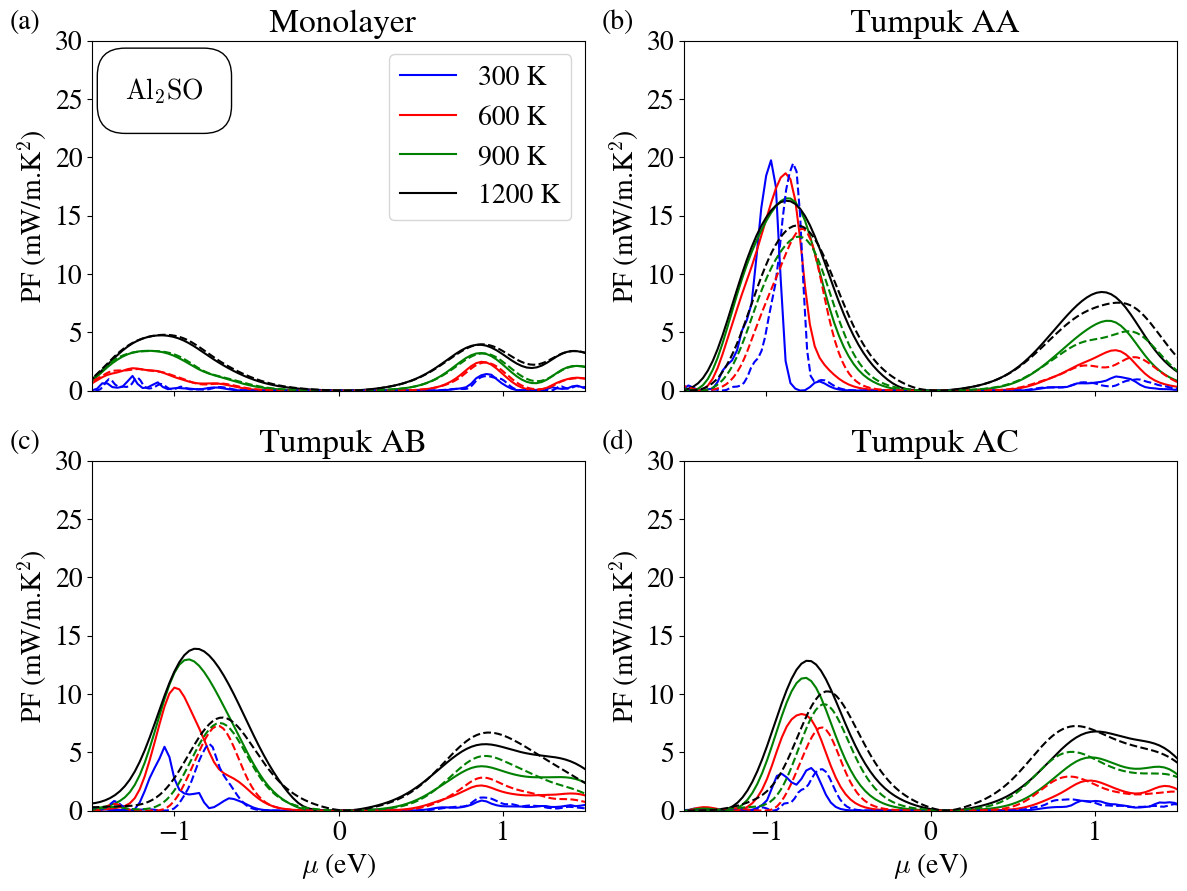

In [127]:
fig, axs = plt.subplots(2,2,figsize=(14,10),sharex=True)
axs[0][0].plot(X3_PF_M_tvdw,Y3_PF_M_tvdw*tau*1000, color ='blue', label='300 K')
axs[0][0].plot(X6_PF_M_tvdw,Y6_PF_M_tvdw*tau*1000, color ='red', label='600 K')
axs[0][0].plot(X9_PF_M_tvdw,Y9_PF_M_tvdw*tau*1000, color='green', label ='900 K')
axs[0][0].plot(X12_PF_M_tvdw,Y12_PF_M_tvdw*tau*1000, color='black', label ='1200 K')
axs[0][0].plot(X3_PF_M_vdw,Y3_PF_M_vdw*tau*1000, color ='blue', linestyle='dashed')
axs[0][0].plot(X6_PF_M_vdw,Y6_PF_M_vdw*tau*1000, color ='red', linestyle='dashed')
axs[0][0].plot(X9_PF_M_vdw,Y9_PF_M_vdw*tau*1000, color='green', linestyle='dashed')
axs[0][0].plot(X12_PF_M_vdw,Y12_PF_M_vdw*tau*1000, color='black', linestyle='dashed')
axs[0][0].set_title(r' Monolayer')
axs[0][0].set_ylabel(r'PF (mW/m.K$^2$)' )
# axs[0][0].set_xlabel(r'$\mu$ (eV)' )
axs[0][0].set_xlim([-1.5, 1.5])
axs[0][0].set_ylim([0,30])
axs[0][0].legend()
axs[0][0].text(-1.3,25,r'$\mathrm{Al}_{2}\mathrm{SO}$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

axs[0][1].plot(X3_PF_AA_tvdw,Y3_PF_AA_tvdw*tau*1000, color ='blue', label='300 K')
axs[0][1].plot(X6_PF_AA_tvdw,Y6_PF_AA_tvdw*tau*1000, color ='red', label='600 K')
axs[0][1].plot(X9_PF_AA_tvdw,Y9_PF_AA_tvdw*tau*1000, color='green', label ='900 K')
axs[0][1].plot(X12_PF_AA_tvdw,Y12_PF_AA_tvdw*tau*1000, color='black', label ='1200 K')
axs[0][1].plot(X3_PF_AA_vdw,Y3_PF_AA_vdw*tau*1000, color ='blue', linestyle='dashed')
axs[0][1].plot(X6_PF_AA_vdw,Y6_PF_AA_vdw*tau*1000, color ='red', linestyle='dashed')
axs[0][1].plot(X9_PF_AA_vdw,Y9_PF_AA_vdw*tau*1000, color='green', linestyle='dashed')
axs[0][1].plot(X12_PF_AA_vdw,Y12_PF_AA_vdw*tau*1000, color='black', linestyle='dashed')
axs[0][1].set_title(r' Tumpuk AA')
axs[0][1].set_ylabel(r'PF (mW/m.K$^2$)' )
# axs[0][1].set_xlabel(r'$\mu$ (eV)' )
axs[0][1].set_xlim([-1.5, 1.5])
axs[0][1].set_ylim([0,30])

axs[1][0].plot(X3_PF_AB_tvdw,Y3_PF_AB_tvdw*tau*1000, color ='blue', label='300 K')
axs[1][0].plot(X6_PF_AB_tvdw,Y6_PF_AB_tvdw*tau*1000, color ='red', label='600 K')
axs[1][0].plot(X9_PF_AB_tvdw,Y9_PF_AB_tvdw*tau*1000, color='green', label ='900 K')
axs[1][0].plot(X12_PF_AB_tvdw,Y12_PF_AB_tvdw*tau*1000, color='black', label ='1200 K')
axs[1][0].plot(X3_PF_AB_vdw,Y3_PF_AB_vdw*tau*1000, color ='blue', linestyle='dashed')
axs[1][0].plot(X6_PF_AB_vdw,Y6_PF_AB_vdw*tau*1000, color ='red', linestyle='dashed')
axs[1][0].plot(X9_PF_AB_vdw,Y9_PF_AB_vdw*tau*1000, color='green', linestyle='dashed')
axs[1][0].plot(X12_PF_AB_vdw,Y12_PF_AB_vdw*tau*1000, color='black', linestyle='dashed')
axs[1][0].set_title(r' Tumpuk AB')
axs[1][0].set_ylabel(r'PF (mW/m.K$^2$)' )
axs[1][0].set_xlabel(r'$\mu$ (eV)' )
axs[1][0].set_xlim([-1.5, 1.5])
axs[1][0].set_ylim([0,30])

axs[1][1].plot(X3_PF_AC_tvdw,Y3_PF_AC_tvdw*tau*1000, color ='blue', label='300 K')
axs[1][1].plot(X6_PF_AC_tvdw,Y6_PF_AC_tvdw*tau*1000, color ='red', label='600 K')
axs[1][1].plot(X9_PF_AC_tvdw,Y9_PF_AC_tvdw*tau*1000, color='green', label ='900 K')
axs[1][1].plot(X12_PF_AC_tvdw,Y12_PF_AC_tvdw*tau*1000, color='black', label ='1200 K')
axs[1][1].plot(X3_PF_AC_vdw,Y3_PF_AC_vdw*tau*1000, color ='blue', linestyle='dashed')
axs[1][1].plot(X6_PF_AC_vdw,Y6_PF_AC_vdw*tau*1000, color ='red', linestyle='dashed')
axs[1][1].plot(X9_PF_AC_vdw,Y9_PF_AC_vdw*tau*1000, color='green', linestyle='dashed')
axs[1][1].plot(X12_PF_AC_vdw,Y12_PF_AC_vdw*tau*1000, color='black', linestyle='dashed')
axs[1][1].set_title(r' Tumpuk AC')
axs[1][1].set_ylabel(r'PF (mW/m.K$^2$)' )
axs[1][1].set_xlabel(r'$\mu$ (eV)' )
axs[1][1].set_xlim([-1.5, 1.5])
axs[1][1].set_ylim([0,30])
axs[0][0].text(-2.0, 31,'(a)')
axs[0][1].text(-2.0, 31,'(b)')
axs[1][0].text(-2.0, 31,'(c)')
axs[1][1].text(-2.0, 31,'(d)')
plt.savefig('pf_al2so.pdf', bbox_inches='tight')
plt.show()

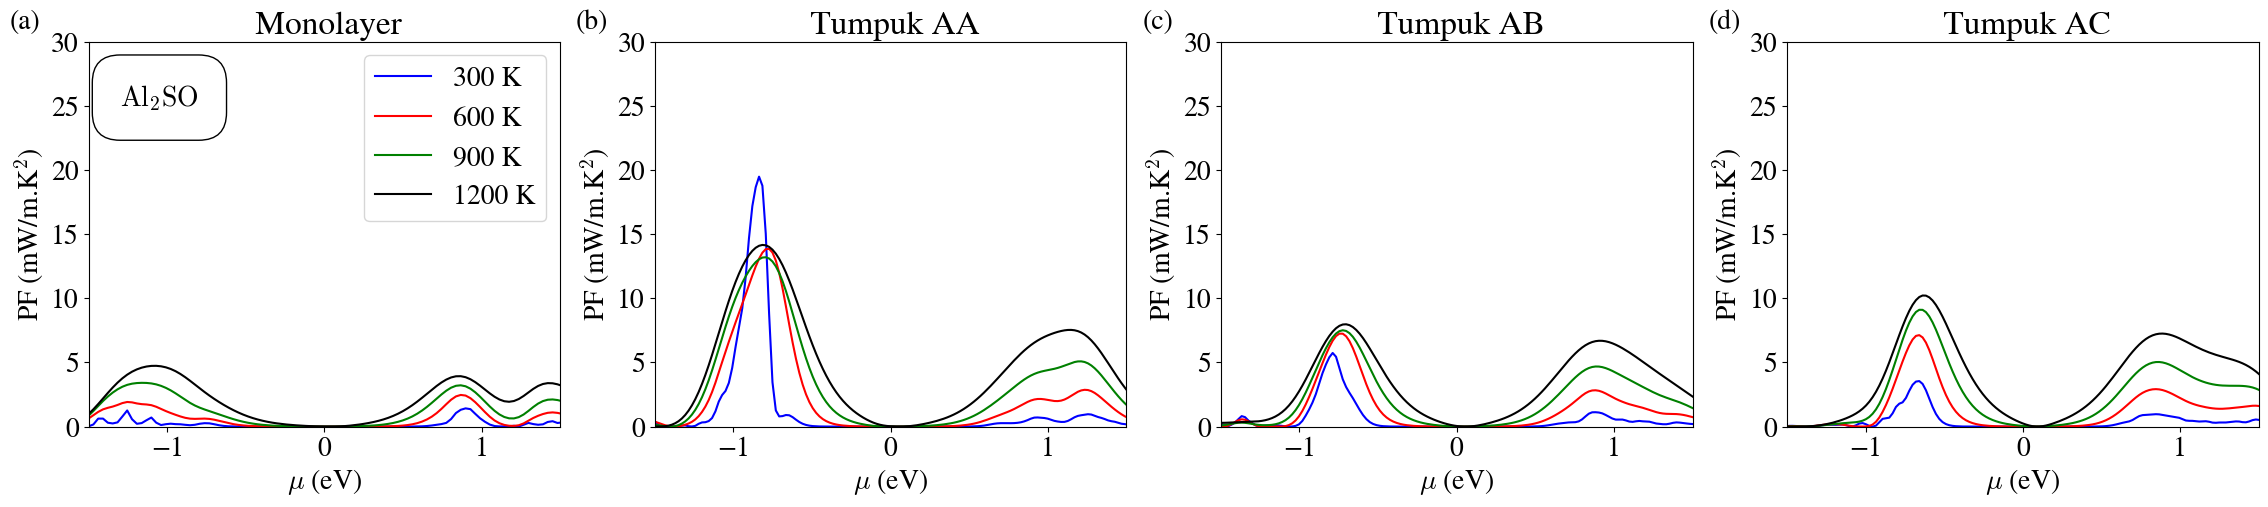

In [172]:
fig, axs = plt.subplots(1,4,figsize=(28,5))
axs[0].plot(X3_PF_M_tvdw,Y3_PF_M_tvdw*tau*1000, color ='blue', label='300 K')
axs[0].plot(X6_PF_M_tvdw,Y6_PF_M_tvdw*tau*1000, color ='red', label='600 K')
axs[0].plot(X9_PF_M_tvdw,Y9_PF_M_tvdw*tau*1000, color='green', label ='900 K')
axs[0].plot(X12_PF_M_tvdw,Y12_PF_M_tvdw*tau*1000, color='black', label ='1200 K')
axs[0].set_title(r' Monolayer')
axs[0].set_ylabel(r'PF (mW/m.K$^2$)' )
axs[0].set_xlabel(r'$\mu$ (eV)' )
axs[0].set_xlim([-1.5, 1.5])
axs[0].set_ylim([0,30])
axs[0].legend()
axs[0].text(-1.3,25,r'$\mathrm{Al}_{2}\mathrm{SO}$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

axs[1].plot(X3_PF_AA_vdw,Y3_PF_AA_vdw*tau*1000, color ='blue', linestyle='solid')
axs[1].plot(X6_PF_AA_vdw,Y6_PF_AA_vdw*tau*1000, color ='red', linestyle='solid')
axs[1].plot(X9_PF_AA_vdw,Y9_PF_AA_vdw*tau*1000, color='green', linestyle='solid')
axs[1].plot(X12_PF_AA_vdw,Y12_PF_AA_vdw*tau*1000, color='black', linestyle='solid')
axs[1].set_title(r' Tumpuk AA')
axs[1].set_ylabel(r'PF (mW/m.K$^2$)' )
axs[1].set_xlabel(r'$\mu$ (eV)' )
axs[1].set_xlim([-1.5, 1.5])
axs[1].set_ylim([0,30])

axs[2].plot(X3_PF_AB_vdw,Y3_PF_AB_vdw*tau*1000, color ='blue', linestyle='solid')
axs[2].plot(X6_PF_AB_vdw,Y6_PF_AB_vdw*tau*1000, color ='red', linestyle='solid')
axs[2].plot(X9_PF_AB_vdw,Y9_PF_AB_vdw*tau*1000, color='green', linestyle='solid')
axs[2].plot(X12_PF_AB_vdw,Y12_PF_AB_vdw*tau*1000, color='black', linestyle='solid')
axs[2].set_title(r' Tumpuk AB')
axs[2].set_ylabel(r'PF (mW/m.K$^2$)' )
axs[2].set_xlabel(r'$\mu$ (eV)' )
axs[2].set_xlim([-1.5, 1.5])
axs[2].set_ylim([0,30])

axs[3].plot(X3_PF_AC_vdw,Y3_PF_AC_vdw*tau*1000, color ='blue', linestyle='solid')
axs[3].plot(X6_PF_AC_vdw,Y6_PF_AC_vdw*tau*1000, color ='red', linestyle='solid')
axs[3].plot(X9_PF_AC_vdw,Y9_PF_AC_vdw*tau*1000, color='green', linestyle='solid')
axs[3].plot(X12_PF_AC_vdw,Y12_PF_AC_vdw*tau*1000, color='black', linestyle='solid')
axs[3].set_title(r' Tumpuk AC')
axs[3].set_ylabel(r'PF (mW/m.K$^2$)' )
axs[3].set_xlabel(r'$\mu$ (eV)' )
axs[3].set_xlim([-1.5, 1.5])
axs[3].set_ylim([0,30])
axs[0].text(-2.0, 31,'(a)')
axs[1].text(-2.0, 31,'(b)')
axs[2].text(-2.0, 31,'(c)')
axs[3].text(-2.0, 31,'(d)')
plt.savefig('pf_al2so_ppt.jpeg', bbox_inches='tight')
plt.show()

In [129]:
# fig, axs = plt.subplots(2,2,figsize=(14,10),sharex=True)
# axs[0][0].plot(X3_PF_M_tvdw,Y3_PF_M_tvdw*tau*1000, color ='blue', label='300 K')
# axs[0][0].plot(X6_PF_M_tvdw,Y6_PF_M_tvdw*tau*1000, color ='red', label='600 K')
# axs[0][0].plot(X9_PF_M_tvdw,Y9_PF_M_tvdw*tau*1000, color='green', label ='900 K')
# axs[0][0].plot(X12_PF_M_tvdw,Y12_PF_M_tvdw*tau*1000, color='black', label ='1200 K')
# axs[0][0].set_title(r' Monolayer')
# axs[0][0].set_ylabel(r'PF (mW/m.K$^2$)' )
# # axs[0][0].set_xlabel(r'$\mu$ (eV)' )
# axs[0][0].set_xlim([-1.5, 1.5])
# axs[0][0].set_ylim([0,10])
# axs[0][0].legend()

# axs[0][1].plot(X3_PF_AA_tvdw,Y3_PF_AA_tvdw*tau*1000, color ='blue', label='300 K')
# axs[0][1].plot(X6_PF_AA_tvdw,Y6_PF_AA_tvdw*tau*1000, color ='red', label='600 K')
# axs[0][1].plot(X9_PF_AA_tvdw,Y9_PF_AA_tvdw*tau*1000, color='green', label ='900 K')
# axs[0][1].plot(X12_PF_AA_tvdw,Y12_PF_AA_tvdw*tau*1000, color='black', label ='1200 K')
# axs[0][1].set_title(r' Tumpuk AA')
# axs[0][1].set_ylabel(r'PF (mW/m.K$^2$)' )
# # axs[0][1].set_xlabel(r'$\mu$ (eV)' )
# axs[0][1].set_xlim([-1.5, 1.5])
# axs[0][1].set_ylim([0,10])

# axs[1][0].plot(X3_PF_AB_tvdw,Y3_PF_AB_tvdw*tau*1000, color ='blue', label='300 K')
# axs[1][0].plot(X6_PF_AB_tvdw,Y6_PF_AB_tvdw*tau*1000, color ='red', label='600 K')
# axs[1][0].plot(X9_PF_AB_tvdw,Y9_PF_AB_tvdw*tau*1000, color='green', label ='900 K')
# axs[1][0].plot(X12_PF_AB_tvdw,Y12_PF_AB_tvdw*tau*1000, color='black', label ='1200 K')
# axs[1][0].set_title(r' Tumpuk AB')
# axs[1][0].set_ylabel(r'PF (mW/m.K$^2$)' )
# axs[1][0].set_xlabel(r'$\mu$ (eV)' )
# axs[1][0].set_xlim([-1.5, 1.5])
# axs[1][0].set_ylim([0,10])

# axs[1][1].plot(X3_PF_AC_tvdw,Y3_PF_AC_tvdw*tau*1000, color ='blue', label='300 K')
# axs[1][1].plot(X6_PF_AC_tvdw,Y6_PF_AC_tvdw*tau*1000, color ='red', label='600 K')
# axs[1][1].plot(X9_PF_AC_tvdw,Y9_PF_AC_tvdw*tau*1000, color='green', label ='900 K')
# axs[1][1].plot(X12_PF_AC_tvdw,Y12_PF_AC_tvdw*tau*1000, color='black', label ='1200 K')
# axs[1][1].set_title(r' Tumpuk AC')
# axs[1][1].set_ylabel(r'PF (mW/m.K$^2$)' )
# axs[1][1].set_xlabel(r'$\mu$ (eV)' )
# axs[1][1].set_xlim([-1.5, 1.5])
# axs[1][1].set_ylim([0,10])
# # plt.savefig('pf_al2so.pdf')
# plt.show()

In [130]:
# fig,axs = plt.subplots(2,1,figsize=(7,8))
# fig.tight_layout(pad=5.0)

# axs[0].plot(X3_S_AA_tvdw,Y3_S_AA_tvdw*1e3, color ='blue', label='300 K')
# axs[0].plot(X6_S_AA_tvdw,Y6_S_AA_tvdw*1e3, color ='red', label='600 K')
# axs[0].plot(X9_S_AA_tvdw,Y9_S_AA_tvdw*1e3, color='green', label ='900 K')
# axs[0].plot(X12_S_AA_tvdw,Y12_S_AA_tvdw*1e3, color='black', label ='1200 K')
# axs[0].set_title(r'Seebeck Coefficient of $Al_{2}S_{2}$ non-vdW')
# axs[0].set_ylabel(r'S (mV/K)' )
# axs[0].set_xlabel(r'$\mu$ (eV)' )
# axs[0].set_xlim([-1.5, 1.5])
# # plt.legend()

# axs[1].plot(X3_ZTe_M_tvdw,Y3_ZTe_M_tvdw, color ='blue', label='300 K')
# axs[1].plot(X6_ZTe_M_tvdw,Y6_ZTe_M_tvdw, color ='red', label='600 K')
# axs[1].plot(X9_ZTe_M_tvdw,Y9_ZTe_M_tvdw, color='green', label ='900 K')
# axs[1].plot(X12_ZTe_M_tvdw,Y12_ZTe_M_tvdw, color='black', label ='1200 K')
# axs[1].set_title(r'$ZT_\mathrm{e}$ of $Al_{2}S_{2}$ non-vdW')
# axs[1].set_ylabel(r'$ZT_\mathrm{e}$' )
# axs[1].set_xlabel(r'$\mu$ (eV)' )
# axs[1].set_xlim([-1.5, 1.5])
# axs[1].set_ylim([0,4])
# plt.show()

In [131]:
2*np.sqrt(3)

3.4641016151377544

In [132]:
a3=pd.DataFrame({
    'ACu':X3_S_AC_tvdw,
    'S':Y3_S_AC_tvdw*1000
})
a3.reset_index(drop=True, inplace=True)

b3=pd.DataFrame({
    'ACu':X3_s_AC_tvdw,
    'sigma':Y3_s_AC_tvdw*tau*1e-6 
})
b3.reset_index(drop=True, inplace=True)

c3=pd.DataFrame({
    'ACu':X3_k_AC_tvdw,
    'kappa_e':Y3_k_AC_tvdw*tau
})
c3.reset_index(drop=True, inplace=True)

d3=pd.DataFrame({
    'ACu':X3_ZTe_AC_tvdw,
    'zt_e':Y3_ZTe_AC_tvdw
})
d3.reset_index(drop=True, inplace=True)

e3=pd.DataFrame({
    'ACu':X3_PF_AC_tvdw,
    'pf':Y3_PF_AC_tvdw*1e-11
})
e3.reset_index(drop=True, inplace=True)

In [133]:
a6=pd.DataFrame({
    'ACu':X6_S_AC_tvdw,
    'S':Y6_S_AC_tvdw*1000
})
a6.reset_index(drop=True, inplace=True)

b6=pd.DataFrame({
    'ACu':X6_s_AC_tvdw,
    'sigma':Y6_s_AC_tvdw*tau*1e-6 
})
b6.reset_index(drop=True, inplace=True)

c6=pd.DataFrame({
    'ACu':X6_k_AC_tvdw,
    'kappa_e':Y6_k_AC_tvdw*tau
})
c6.reset_index(drop=True, inplace=True)

d6=pd.DataFrame({
    'ACu':X6_ZTe_AC_tvdw,
    'zt_e':Y6_ZTe_AC_tvdw
})
d6.reset_index(drop=True, inplace=True)

e6=pd.DataFrame({
    'ACu':X6_PF_AC_tvdw,
    'pf':Y6_PF_AC_tvdw*1e-11
})
e6.reset_index(drop=True, inplace=True)

In [134]:
a9=pd.DataFrame({
    'ACu':X9_S_AC_tvdw,
    'S':Y9_S_AC_tvdw*1000
})
a9.reset_index(drop=True, inplace=True)

b9=pd.DataFrame({
    'ACu':X9_s_AC_tvdw,
    'sigma':Y9_s_AC_tvdw*tau*1e-6 
})
b9.reset_index(drop=True, inplace=True)

c9=pd.DataFrame({
    'ACu':X9_k_AC_tvdw,
    'kappa_e':Y9_k_AC_tvdw*tau
})
c9.reset_index(drop=True, inplace=True)

d9=pd.DataFrame({
    'ACu':X9_ZTe_AC_tvdw,
    'zt_e':Y9_ZTe_AC_tvdw
})
d9.reset_index(drop=True, inplace=True)

e9=pd.DataFrame({
    'ACu':X9_PF_AC_tvdw,
    'pf':Y9_PF_AC_tvdw*1e-11
})
e9.reset_index(drop=True, inplace=True)

In [135]:
a12=pd.DataFrame({
    'ACu':X12_S_AC_tvdw,
    'S':Y12_S_AC_tvdw*1000
})
a12.reset_index(drop=True, inplace=True)

b12=pd.DataFrame({
    'ACu':X12_s_AC_tvdw,
    'sigma':Y12_s_AC_tvdw*tau*1e-6 
})
b12.reset_index(drop=True, inplace=True)

c12=pd.DataFrame({
    'ACu':X12_k_AC_tvdw,
    'kappa_e':Y12_k_AC_tvdw*tau
})
c12.reset_index(drop=True, inplace=True)

d12=pd.DataFrame({
    'ACu':X12_ZTe_AC_tvdw,
    'zt_e':Y12_ZTe_AC_tvdw
})
d12.reset_index(drop=True, inplace=True)

e12=pd.DataFrame({
    'ACu':X12_PF_AC_tvdw,
    'pf':Y12_PF_AC_tvdw*1e-11
})
e12.reset_index(drop=True, inplace=True)

In [136]:
a3.iloc[450:500,:]

,ACu,S
450,0.079520,0.000000
451,0.109358,0.000000
452,0.139209,0.000000
453,0.169060,0.000000
454,0.198897,0.000000
455,0.228748,0.000000
456,0.258599,-1.492290
457,0.288436,-1.439530
458,0.318287,-1.373910
459,0.348138,-1.301100


In [137]:
b9

,ACu,sigma
0,-13.351129,1.00732
1,-13.321291,1.02251
2,-13.291440,1.03656
3,-13.261589,1.04939
4,-13.231752,1.06094
...,...,...
921,14.136984,6.26914
922,14.166781,6.06226
923,14.196577,5.85903
924,14.226510,5.66219


In [138]:
print(a3.iloc[450:500,:].sort_values(by="S", ascending=True).head(1))
print(a6.iloc[450:500,:].sort_values(by="S", ascending=True).head(1))
print(a9.iloc[450:500,:].sort_values(by="S", ascending=True).head(1))
print(a12.iloc[450:500,:].sort_values(by="S", ascending=True).head(1))

          ACu        S
456  0.258599 -1.49229
         ACu       S
453  0.16906 -1.0692
          ACu         S
456  0.258599 -0.713129
          ACu         S
457  0.288436 -0.555977


In [139]:
print(b3.iloc[450:500,:].sort_values(by="sigma", ascending=False).head(1))
print(b6.iloc[450:500,:].sort_values(by="sigma", ascending=False).head(1))
print(b9.iloc[450:500,:].sort_values(by="sigma", ascending=False).head(1))
print(b12.iloc[450:500,:].sort_values(by="sigma", ascending=False).head(1))

         ACu    sigma
499  1.54197  1.88934
         ACu    sigma
499  1.54197  1.87501
         ACu    sigma
499  1.54197  1.85784
         ACu    sigma
499  1.54197  1.84305


In [140]:
print(c3.iloc[450:500,:].sort_values(by="kappa_e", ascending=False).head(1))
print(c6.iloc[450:500,:].sort_values(by="kappa_e", ascending=False).head(1))
print(c9.iloc[450:500,:].sort_values(by="kappa_e", ascending=False).head(1))
print(c12.iloc[450:500,:].sort_values(by="kappa_e", ascending=False).head(1))

         ACu  kappa_e
499  1.54197  13.5304
         ACu  kappa_e
499  1.54197   25.424
         ACu  kappa_e
499  1.54197  35.8002
         ACu  kappa_e
499  1.54197   44.884


In [141]:
print(d3.iloc[450:500,:].sort_values(by="zt_e", ascending=False).head(1))
print(d6.iloc[450:500,:].sort_values(by="zt_e", ascending=False).head(1))
print(d9.iloc[450:500,:].sort_values(by="zt_e", ascending=False).head(1))
print(d12.iloc[450:500,:].sort_values(by="zt_e", ascending=False).head(1))

          ACu          zt_e
456  0.258599  7.139711e+14
          ACu      zt_e
455  0.228748  4.259127
          ACu      zt_e
459  0.348138  1.477033
          ACu     zt_e
462  0.437663  0.91424


In [142]:
print(e3.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1))
print(e6.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1))
print(e9.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1))
print(e12.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1))

         ACu        pf
478  0.91521  0.842979
          ACu        pf
480  0.974898  2.573046
          ACu        pf
480  0.974898  4.560677
          ACu        pf
481  1.004735  6.781361


In [143]:
a6.iloc[450:500,:].sort_values(by="S", ascending=False).head(1)

,ACu,S
499,1.54197,-0.027893


In [144]:
a9.iloc[450:500,:].sort_values(by="S", ascending=False).head(1)

,ACu,S
450,0.07952,0.095382


In [145]:
a12.iloc[450:500,:].sort_values(by="S", ascending=False).head(1)

,ACu,S
450,0.07952,0.145948


In [146]:
e3.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
478,0.91521,0.842979


In [147]:
e3.iloc[448:498,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
478,0.91521,0.842979


In [148]:
e6.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
480,0.974898,2.573046


In [149]:
e6.iloc[448:498,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
480,0.974898,2.573046


In [150]:
e9.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
480,0.974898,4.560677


In [151]:
e9.iloc[448:498,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
480,0.974898,4.560677


In [152]:
e12.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
481,1.004735,6.781361


In [153]:
e12.iloc[448:498,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
481,1.004735,6.781361


In [154]:
# #data kappa_ph
# kappa300 = 0.5650223626995302
# kappa600 = 0.2849765846754545
# kappa900 = 0.1904278584304656
# kappa1200 = 0.17144968015888076

In [155]:
# # data kappa ph jurnal 

# kappa300_jurnal = 11.02352
# kappa600_jurnal = 5.9867576
# kappa900_jurnal = 4.9523511
# kappa1200_jurnal = 3.00211241

In [156]:
# fig, axs = plt.subplots(1,3,figsize=(21,5))
# axs[0].plot(X3_ZTe_M_tvdw,Y3_ZTe_M_tvdw, color ='blue', label='300 K')
# axs[0].plot(X6_ZTe_M_tvdw,Y6_ZTe_M_tvdw, color ='red', label='600 K')
# axs[0].plot(X9_ZTe_M_tvdw,Y9_ZTe_M_tvdw, color='green', label ='900 K')
# axs[0].plot(X12_ZTe_M_tvdw,Y12_ZTe_M_tvdw, color='black', label ='1200 K')

# axs[0].set_title(r'$ZT_\mathrm{e}$ of $Al_{2}S_{2}$ non-vdW')

# axs[0].set_ylabel(r'$ZT_\mathrm{e}$' )
# axs[0].set_xlabel(r'$\mu$ (eV)' )
# axs[0].set_xlim([-1.5, 1.5])
# axs[0].set_ylim([0,7])


# axs[1].plot(X3_ZTe_M_tvdw,(datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,4]*(datM_tvdw300.iloc[:,5]*tau))*300/((datM_tvdw300.iloc[:,7]*tau)+kappa300), color ='blue', label='300 K')
# axs[1].plot(X6_ZTe_M_tvdw,(datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,4]*(datM_tvdw600.iloc[:,5]*tau))*600/((datM_tvdw600.iloc[:,7]*tau)+kappa600), color ='red', label='600 K')
# axs[1].plot(X9_ZTe_M_tvdw,(datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,4]*(datM_tvdw900.iloc[:,5]*tau))*900/((datM_tvdw900.iloc[:,7]*tau)+kappa900), color='green', label ='900 K')
# axs[1].plot(X12_ZTe_M_tvdw,(datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,4]*(datM_tvdw1200.iloc[:,5]*tau))*1200/((datM_tvdw1200.iloc[:,7]*tau)+kappa1200), color='black', label ='1200 K')

# axs[1].set_title(r'$ZT$ of $Al_{2}S_{2}$ non-vdW')

# axs[1].set_ylabel(r'$ZT$' )
# axs[1].set_xlabel(r'$\mu$ (eV)' )
# axs[1].set_xlim([-1.5, 1.5])
# axs[1].set_ylim([0,7])

# axs[2].plot(X3_ZTe_M_tvdw,(datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,4]*(datM_tvdw300.iloc[:,5]*tau))*300/((datM_tvdw300.iloc[:,7]*tau)+kappa300_jurnal), color ='blue', label='300 K')
# axs[2].plot(X6_ZTe_M_tvdw,(datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,4]*(datM_tvdw600.iloc[:,5]*tau))*600/((datM_tvdw600.iloc[:,7]*tau)+kappa600_jurnal), color ='red', label='600 K')
# axs[2].plot(X9_ZTe_M_tvdw,(datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,4]*(datM_tvdw900.iloc[:,5]*tau))*900/((datM_tvdw900.iloc[:,7]*tau)+kappa900_jurnal), color='green', label ='900 K')
# axs[2].plot(X12_ZTe_M_tvdw,(datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,4]*(datM_tvdw1200.iloc[:,5]*tau))*1200/((datM_tvdw1200.iloc[:,7]*tau)+kappa1200_jurnal), color='black', label ='1200 K')
# axs[2].set_title(r'$ZT$ of $Al_{2}S_{2}$ non-vdW')
# axs[2].set_ylabel(r'$ZT$' )
# axs[2].set_xlabel(r'$\mu$ (eV)' )
# axs[2].set_xlim([-1.5, 1.5])
# axs[2].set_ylim([0,7])

# axs[2].legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
# plt.show()

In [157]:
# def buatDataframe(temp, zt_hitung, zt_jurnal):
#     df = pd.DataFrame({
#         'T':temp, 
#         'ZT_hitung' : zt_hitung, 
#         'ZT_jurnal': zt_jurnal
#     })
#     return df 

In [158]:
# zt300 = pd.DataFrame({
#   'mu':X3_ZTe_M_tvdw, 
#   'ZT_hitung' : (datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,4]*(datM_tvdw300.iloc[:,5]*tau))*300/((datM_tvdw300.iloc[:,7]*tau)+kappa300),
#   'ZT_jurnal': (datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,4]*(datM_tvdw300.iloc[:,5]*tau))*300/((datM_tvdw300.iloc[:,7]*tau)+kappa300_jurnal)
#   })
# zt300.reset_index(drop=True, inplace=True)


In [159]:
# zt300.iloc[474:584,:].sort_values(by="ZT_hitung", ascending=False).head(1)

In [160]:
# zt300.iloc[474:584,:].sort_values(by="ZT_jurnal", ascending=False).head(1)

In [161]:
# zt600 = pd.DataFrame({
#   'mu':X6_ZTe_M_tvdw, 
#   'ZT_hitung' : (datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,4]*(datM_tvdw600.iloc[:,5]*tau))*600/((datM_tvdw600.iloc[:,7]*tau)+kappa600),
#   'ZT_jurnal': (datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,4]*(datM_tvdw600.iloc[:,5]*tau))*600/((datM_tvdw600.iloc[:,7]*tau)+kappa600_jurnal)
#   })
# zt600.reset_index(drop=True, inplace=True)
# zt600

In [162]:
# zt600.iloc[474:584,:].sort_values(by="ZT_hitung", ascending=False).head(1)

In [163]:
# zt600.iloc[474:584,:].sort_values(by="ZT_jurnal", ascending=False).head(1)

In [164]:
# zt900 = pd.DataFrame({
#   'mu':X9_ZTe_M_tvdw, 
#   'ZT_hitung' : (datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,4]*(datM_tvdw900.iloc[:,5]*tau))*900/((datM_tvdw900.iloc[:,7]*tau)+kappa900),
#   'ZT_jurnal': (datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,4]*(datM_tvdw900.iloc[:,5]*tau))*900/((datM_tvdw900.iloc[:,7]*tau)+kappa900_jurnal)
#   })
# zt900.reset_index(drop=True, inplace=True)
# zt900

In [165]:
# zt900.iloc[474:584,:].sort_values(by="ZT_hitung", ascending=False).head(1)

In [166]:
# zt900.iloc[474:584,:].sort_values(by="ZT_jurnal", ascending=False).head(1)

In [167]:
# zt1200 = pd.DataFrame({
#   'mu':X12_ZTe_M_tvdw, 
#   'ZT_hitung' : (datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,4]*(datM_tvdw1200.iloc[:,5]*tau))*1200/((datM_tvdw1200.iloc[:,7]*tau)+kappa1200),
#   'ZT_jurnal': (datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,4]*(datM_tvdw1200.iloc[:,5]*tau))*1200/((datM_tvdw1200.iloc[:,7]*tau)+kappa1200_jurnal)
#   })
# zt1200.reset_index(drop=True, inplace=True)
# zt1200

In [168]:
# zt1200.iloc[474:584,:].sort_values(by="ZT_hitung", ascending=False).head(1)

In [169]:
# zt1200.iloc[474:584,:].sort_values(by="ZT_jurnal", ascending=False).head(1)

In [170]:
# fig, axs = plt.subplots(2,2,figsize=(14,12))

# axs[0][0].plot(zt300['mu'],zt300['ZT_hitung'], color ='blue', label = 'Hitung')
# axs[0][0].plot(zt300['mu'],zt300['ZT_jurnal'], color = 'red', label = 'Jurnal')
# axs[0][0].set_xlim([-1.5,1.5])
# axs[0][0].set_ylabel(r'$ZT$' )
# # axs[0][0].set_xlabel(r'$\mu$ (eV)' )
# axs[0][0].set_title('Selisih pada 300 K')

# axs[0][1].plot(zt600['mu'],zt600['ZT_hitung'], color ='blue', label = 'Hitung')
# axs[0][1].plot(zt600['mu'],zt600['ZT_jurnal'], color = 'red', label = 'Jurnal')
# axs[0][1].set_xlim([-1.5,1.5])
# axs[0][1].set_ylabel(r'$ZT$' )
# # axs[0][1].set_xlabel(r'$\mu$ (eV)' )
# axs[0][1].set_title('Selisih pada 600 K')
# axs[0][1].legend(loc='right', bbox_to_anchor=(1.3, -0.1))

# axs[1][0].plot(zt900['mu'],zt900['ZT_hitung'], color ='blue', label = 'Hitung')
# axs[1][0].plot(zt900['mu'],zt900['ZT_jurnal'], color = 'red', label = 'Jurnal')
# axs[1][0].set_xlim([-1.5,1.5])
# axs[1][0].set_ylabel(r'$ZT$' )
# axs[1][0].set_xlabel(r'$\mu$ (eV)' )
# axs[1][0].set_title('Selisih pada 900 K')

# axs[1][1].plot(zt1200['mu'],zt1200['ZT_hitung'], color ='blue', label = 'Hitung')
# axs[1][1].plot(zt1200['mu'],zt1200['ZT_jurnal'], color = 'red', label = 'Jurnal')
# axs[1][1].set_xlim([-1.5,1.5])
# axs[1][1].set_ylabel(r'$ZT$' )
# axs[1][1].set_xlabel(r'$\mu$ (eV)' )
# axs[1][1].set_title('Selisih pada 1200 K')

In [171]:
# print('========300 K==========')
# print(f"Dengan kappa phonon perhitungan, didapat ZT     = {zt300['ZT_hitung'].iloc[474:584].max()}")
# print(f"Dengan kappa phonon jurnal, didapat ZT          = {zt300['ZT_jurnal'].iloc[474:584].max()}")

# print('========600 K==========')
# print(f"Dengan kappa phonon perhitungan, didapat ZT     = {zt600['ZT_hitung'].iloc[474:584].max()}")
# print(f"Dengan kappa phonon jurnal, didapat ZT          = {zt600['ZT_jurnal'].iloc[474:584].max()}")

# print('========900 K==========')
# print(f"Dengan kappa phonon perhitungan, didapat ZT     = {zt900['ZT_hitung'].iloc[474:584].max()}")
# print(f"Dengan kappa phonon jurnal, didapat ZT          = {zt900['ZT_jurnal'].iloc[474:584].max()}")

# print('========1200 K==========')
# print(f"Dengan kappa phonon perhitungan, didapat ZT     = {zt1200['ZT_hitung'].iloc[474:584].max()}")
# print(f"Dengan kappa phonon jurnal, didapat ZT          = {zt1200['ZT_jurnal'].iloc[474:584].max()}")